# Incentive Code

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as la
import argparse
import pickle
import sys
sys.path.append("../")  
from utils_so import *
import scipy.linalg  as sla

import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
from tqdm import tqdm, trange
%load_ext autoreload
%autoreload 2
# https://plotly.com/python/static-image-export/ need to install this if you want to save images
import plotly.express as px
px.set_mapbox_access_token("pk.eyJ1IjoicmF0bGlmZmxqIiwiYSI6ImNqOGJ4cm8wcjAzN3QyeG1zcnZvMjB5bGUifQ.iRkpBPE-WANBkVc9ffI8ng")

# set flags
verbose=False # print out stuff for debugging
centered=False # centering the data

import random
get_colors = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
cs=get_colors(100) # sample return:  ['#8af5da', '#fbc08c', '#b741d0']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$$f_i(x_1,x_2)=-\frac{1}{2}z_i^\top x_i+\frac{1}{2}\lambda_i x_i^\top x_i=-\frac{1}{2}(\xi_i+u_i+A_{ii}x_i+A_{i,-i}x_{-i})^\top x_i+\frac{1}{2}\lambda_ix_i^\top x_i$$

$$\nabla_if_i(x_i,x_{-i})=-A_{ii}x_i-\frac{1}{2}(\xi_i+u_i+A_{i,-i}x_{-i,i})+\lambda_ix_i$$

$$\nabla_1f_1=0\implies \ 0=-A_{11}x_1-\frac{1}{2}(\xi_1+u_1+A_{1,2}x_2)+\lambda_1x_1$$
$$\nabla_2f_2=0\implies \ 0=-A_{22}x_2-\frac{1}{2}(\xi_2+u_2+A_{2,1}x_1)+\lambda_2x_2$$

$$\begin{bmatrix} (-A_{11}+\lambda_1I)x_1-\frac{1}{2}A_{12}x_2-\frac{1}{2}(\xi_1+u_1)\\
 -\frac{1}{2}A_{21}x_1+(-A_{22}+\lambda_2I)x_2-\frac{1}{2}(\xi_2+u_2)
\end{bmatrix}=0$$

$$\begin{bmatrix} (-A_{11}+\lambda_1I) &-\frac{1}{2}A_{12}\\
 -\frac{1}{2}A_{21}&(-A_{22}+\lambda_2I)
\end{bmatrix}\begin{bmatrix}x_1\\ x_2\end{bmatrix}=\begin{bmatrix} \frac{1}{2}(\xi_1+u_1)\\
\frac{1}{2}(\xi_2+u_2)
\end{bmatrix}$$


$$\begin{bmatrix}x_1\\ x_2\end{bmatrix}=\begin{bmatrix} (-A_{11}+\lambda_1I) &-\frac{1}{2}A_{12}\\
 -\frac{1}{2}A_{21}&(-A_{22}+\lambda_2I)
\end{bmatrix}^{-1}\begin{bmatrix} \frac{1}{2}(\xi_1+u_1)\\
\frac{1}{2}(\xi_2+u_2)
\end{bmatrix}$$

$\|x^\ast(u)-x^{\tt so}\|^2$

$f_{\tt so}(u)=\frac{1}{2}\|x^\ast(u)-x^{\tt so}\|^2$

$x^\ast(u)=\text{\tt NE}(f_1(x;u),f_2(x;u))$

$\begin{bmatrix}
\nabla_1f_1\\ 
\nabla_2f_2
\end{bmatrix}= \begin{bmatrix}
-(A_{11}-\lambda_1I)^\top x_1-\frac{1}{2}(\xi_1+A_{12}x_2)\\
-(A_{22}-\lambda_2I)^\top x_2-\frac{1}{2}(\xi_2+A_{21}x_1)
\end{bmatrix}$

$\begin{bmatrix}
\nabla_1f_1(;u_1)\\ 
\nabla_2f_2(; u_2)
\end{bmatrix}= \begin{bmatrix}
-(A_{11}-\lambda_1I)^\top x_1-\frac{1}{2}(\xi_1+u_1+A_{12}x_2)\\
-(A_{22}-\lambda_2I)^\top x_2-\frac{1}{2}(\xi_2+u_2+A_{21}x_1)
\end{bmatrix}$

$\begin{bmatrix}
\lambda_1I-A_{11} & -\frac{1}{2}A_{12}\\
-\frac{1}{2}A_{21} & \lambda_2I-A_{22}
\end{bmatrix}\begin{bmatrix}
x_1\\ x_2
\end{bmatrix}-\frac{1}{2}\begin{bmatrix}
\xi_1\\ \xi_2
\end{bmatrix}=\begin{bmatrix}
u_1\\ u_2
\end{bmatrix}$

In expectation, the $\xi$'s drop out so that we have

$x^\ast(u)=\begin{bmatrix}
\lambda_1I-A_{11} & -\frac{1}{2}A_{12}\\
-\frac{1}{2}A_{21} & \lambda_2I-A_{22}
\end{bmatrix}^{-1}\begin{bmatrix}u_1\\ u_2
\end{bmatrix}$

$\nabla_u f_{\tt so}(u)=\nabla_ux^\ast(u)(x^\ast(u)-x^{\tt so}) = \begin{bmatrix}
\lambda_1I-A_{11} & -\frac{1}{2}A_{12}\\
-\frac{1}{2}A_{21} & \lambda_2I-A_{22}
\end{bmatrix}^{-\top}\left(\begin{bmatrix}
\lambda_1I-A_{11} & -\frac{1}{2}A_{12}\\
-\frac{1}{2}A_{21} & \lambda_2I-A_{22}
\end{bmatrix}^{-1}\begin{bmatrix}u_1\\ u_2
\end{bmatrix}-x^{\tt so}\right)$

$x,x^{\tt so}\in \mathbb{R}^{d\times 1}$

$\nabla_u f_{\tt so}\in \mathbb{R}^{d\times 1}$

$u^\ast=Gx_{\tt so}$

$$ x^\ast(u)=\frac{1}{2}G^{-1}(u+\xi)$$

$$\nabla x^\ast(u)=\frac{1}{2}G^{-\top}$$

$$\nabla f_{\tt so}(u)=\frac{1}{2}G^{-\top}(\frac{1}{2}G^{-1}(u+\xi)-x_{\tt so})$$

$$u_{\tt so}=2 Gx_{\tt so}-\xi$$

$$ x_{\tt so}=\frac{1}{2}G^{-1}(u+\xi)$$

$$(x^\ast(u)-x^{\tt so})\nabla x^\ast(u)$$

$\nabla x^\ast(u)=

In [3]:
# run all three cases

loc_cap=1
nu=0.0001 #0.001 and B=4 #0.0005 B=5 #0.00025 B=5/6
eta=5e-5 #1e-4
lam1=2
lam2=2
loc_lst_index=list(range(0,loc_cap))
price_lst_index=list(range(0,2))
x0=np.random.rand(2,loc_cap)
p1=1; p2=0.5

MAXITER=1000
ddgame=ddrideshare(loc_lst_index,price_lst_index,seed=2,lam=[lam1,lam2],tot_rev=0, base=True, params={'A1':[],'A2':[],'Ac1':[],'Ac2':[]},maxx=10)
ddgame.setup_distribution()
alpha = np.min([la.norm(-ddgame.A1+ddgame.lam1*np.eye(ddgame.d)),la.norm(-ddgame.A2+ddgame.lam2*np.eye(ddgame.d))])-0.5*la.norm(ddgame.Ac1+ddgame.Ac2.T)
print(alpha)

dic_rgd_ns={}
dic_so_ns={}
dic_sgd_ns={}
for price_index in range(1,2):

    dic_sgd_ns[price_index]=ddgame.runSGD(x0,eta=0.005,price_index=price_index,BATCH=10,MAXITER=MAXITER, perform_sgd=[True,True],tot_rev=0)
    #dic_agd_n=ddgame.runAGD(x0,eta=0.001,price_index=price_index,BATCH=10,MAXITER=MAXITER,tot_rev=0)
    dic_so_ns[price_index]=ddgame.runSO(x0,eta=0.005,price_index=price_index,MAXITER=MAXITER,tot_rev=0)

../data/datadic.p
18.055355072021484
Price we are running at :  15
Price we are running at :  15


In [4]:
import random
seeds=[random.randint(0,72) for _ in range(9)]
seeds.append(42)
seeds


[53, 53, 17, 64, 41, 47, 19, 41, 10, 42]

In [5]:
seed=42
data={}
#seeds=[42]
for seed in seeds:
    np.random.seed(seed)
    A1_hat = -10*np.random.rand(np.shape(ddgame.A1)[1])
    Ac1_hat = 2*np.random.rand(np.shape(ddgame.Ac1)[1])
    A2_hat = -10*np.random.rand(np.shape(ddgame.A2)[1])
    Ac2_hat = 2*np.random.rand(np.shape(ddgame.Ac2)[1])
    A1_hat=np.diag(A1_hat)
    Ac1_hat=np.diag(Ac1_hat)
    A2_hat=np.diag(A2_hat)
    Ac2_hat=np.diag(Ac2_hat)
    A_dic={}
    A_dic['A1_hat']=A1_hat
    A_dic['Ac1_hat']=Ac1_hat
    A_dic['A2_hat']=A2_hat
    A_dic['Ac2_hat']=Ac2_hat
    B=0.75
    # v4 is 0.9999, 0.00001
    data[seed]=ddgame.runAGDIncent(x0, A_dic,price_index=price_index,seed=seed, decay=0.99999,eta=0.00005, B=1,nu=2, INNERITER=1,BATCH=10000, MAXITER=12000)

MAXITER=len(data[seeds[0]]['A1_hat'])

Price we are running at :  15
5e-05
2
Price we are running at :  15
5e-05
2
Price we are running at :  15
5e-05
2
Price we are running at :  15
5e-05
2
Price we are running at :  15
5e-05
2
Price we are running at :  15
5e-05
2
Price we are running at :  15
5e-05
2
Price we are running at :  15
5e-05
2
Price we are running at :  15
5e-05
2
Price we are running at :  15
5e-05
2


In [824]:
x_ne=dic_sgd_ns[1]['x'][-1]
LEN=12000
player_data={}
player_data[0]=[]
player_data[1]=[]
for seed in seeds:
    traj=np.asarray(data[seed]['x'])
    player_data[0].append(traj[:,0,0])
    player_data[1].append(traj[:,1,0])

for j in range(2): player_data[j]=np.asarray(player_data[j])

player_means={}
player_stds={}
for j in range(2):
    player_means[j]=np.mean(np.abs(player_data[j]-x_ne[j])**2, axis=0)
    player_stds[j]=np.std(np.abs(player_data[j]-x_ne[j])**2, axis=0)

In [825]:
uvals={}
uvals[0]=[]
uvals[1]=[]
for seed in seeds:
    traj=np.asarray(data[seed]['uvals'])
    uvals[0].append(traj[:,0,0])
    uvals[1].append(traj[:,1,0])

for j in range(2): uvals[j]=np.asarray(uvals[j])

uvals_means={}
uvals_stds={}
for j in range(2):
    uvals_means[j]=np.mean(uvals[j], axis=0)
    uvals_stds[j]=np.std(uvals[j], axis=0)

In [826]:

trues=[ddgame.A1, ddgame.Ac1, ddgame.A2, ddgame.Ac2]


Atemp={}
names=['A1_hat', 'Ac1_hat','A2_hat','Ac2_hat']
name_format=[r'$\hat{A}_1$', r'$\hat{A}_{-1}$', r'$\hat{A}_2$', r'$\hat{A}_{-2}$']
As={}
As['A1_hat']={'data':[],'true':ddgame.A1}
As['Ac1_hat']={'data':[],'true':ddgame.Ac1}
As['A2_hat']={'data':[],'true':ddgame.A2}
As['Ac2_hat']={'data':[],'true':ddgame.Ac2}
for name in names:
    for i,seed in enumerate(seeds):
        As[name]['data'].append(data[seeds[i]][name])
for name in names: As[name]['data']=np.asarray(As[name]['data']).reshape(len(seeds), LEN+1)
Ameans={}
Astds={}
for name in names:
    temp_=[]
    temp=As[name]['data']-As[name]['true']
    for i in range(len(seeds)):
        temp_.append([la.norm(t) for t in temp[i]])
    
    #temp_.append(np.asarray([la.norm(t) for t in temp]))
    temp_=np.asarray(temp_)
    
    Ameans[name]={}
    Astds[name]={}
    Ameans[name]['data']=np.mean(temp_, axis=0)
    Astds[name]['data']=np.std(temp_,axis=0)
    Ameans[name]['true']=As[name]['true']


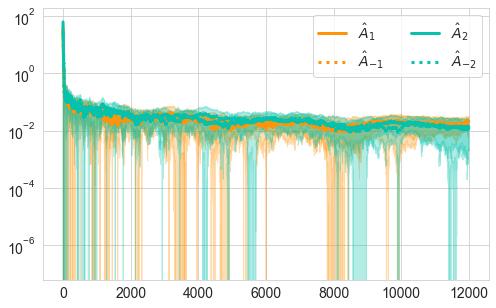

In [827]:
cols=['xkcd:tangerine', 'xkcd:turquoise', 'xkcd:royal purple', 'xkcd:tomato red']
ls=['-',':']
plt.figure(figsize=(8,5))
floc="./figs/20231031/"
if not(os.path.exists(floc)): os.makedirs(floc)
iterations=np.arange(0,LEN+1)
for i,(name,A) in enumerate(Ameans.items()):
    #temp=np.asarray([la.norm(A['data'][i]-A['true'],'fro')**2 for i in range(MAXITER)])
    if i%2==0: lsval=ls[0]
    else: lsval=ls[1]
    if i<2: col=cols[0]
    else: col=cols[1]
    plt.plot(Ameans[name]['data'], linewidth=3, color=col, linestyle=lsval, label=name_format[i])
    plt.fill_between(iterations,Ameans[name]['data']-Astds[name]['data'], Ameans[name]['data']+Astds[name]['data'], color=col,alpha=0.3)

plt.yscale('log')
plt.tick_params(labelsize=14)
plt.legend(fontsize=14, ncol=2)
plt.savefig(floc+"Aerror_v5.png", dpi=300)

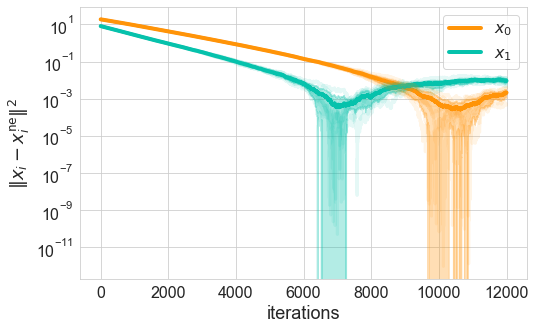

In [828]:
ls=['-','--']
cols=['xkcd:tangerine', 'xkcd:turquoise']
fs=18; lw=4
import os
floc="./figs/20231031/"
if not(os.path.exists(floc)): os.makedirs(floc)
iterations=np.arange(0,LEN+1)
plt.figure(figsize=(8,5))
for j in range(2):
    plt.plot(player_means[j], color=cols[j],label=r"$x_{}$".format(j), linewidth=lw)
    plt.fill_between(iterations,player_means[j]-player_stds[j], player_means[j]+player_stds[j], color=cols[j],alpha=0.3)
for seed in seeds:
    us=np.asarray(data[seed]['x'])

    for j in range(2):
        plt.plot(np.abs(us[:,j]-x_ne[j])**2,color=cols[j],alpha=0.1, linewidth=lw-1)
    plt.legend(loc='best', fontsize=fs-2)
    plt.tick_params(labelsize=fs-2)
    plt.xlabel('iterations', fontsize=fs)
    plt.ylabel(r'$\Vert x_i-x_i^{\tt ne}\Vert^2$',fontsize=fs)
plt.yscale('log')
plt.savefig(floc+"error_so_demand_signal_incentives_v5.png", dpi=300)

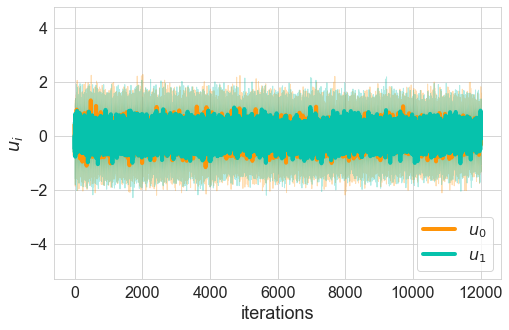

In [829]:
ls=['-','--']
cols=['xkcd:tangerine', 'xkcd:turquoise']
fs=18; lw=4
import os

iterations=np.arange(0,LEN)
plt.figure(figsize=(8,5))
for j in range(2):
    plt.plot(uvals_means[j], color=cols[j],label=r"$u_{}$".format(j), linewidth=lw)
    plt.fill_between(iterations,uvals_means[j]-uvals_stds[j], uvals_means[j]+uvals_stds[j], color=cols[j],alpha=0.3)
for seed in seeds:
    us=np.asarray(data[seed]['uvals'])

    for j in range(2):
        plt.plot(us[:,j],color=cols[j],alpha=0.0, linewidth=lw-1)
    plt.legend(loc='best', fontsize=fs-2)
    plt.tick_params(labelsize=fs-2)
    plt.xlabel('iterations', fontsize=fs)
    plt.ylabel(r'$u_i$',fontsize=fs)
#plt.yscale('log')
plt.savefig(floc+"uvals_v5.png", dpi=300)

In [632]:
x_ne=dic_sgd_ns[1]['x'][-1]
x_ne

array([[4.7601404 ],
       [3.05758488]])

Text(0.5, 0, 'iterations')

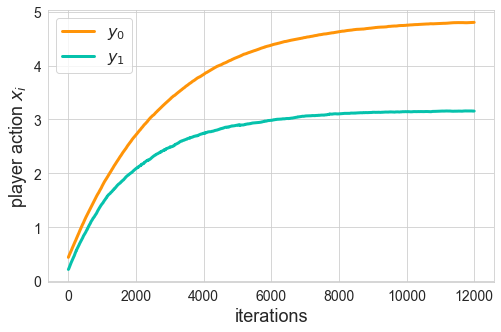

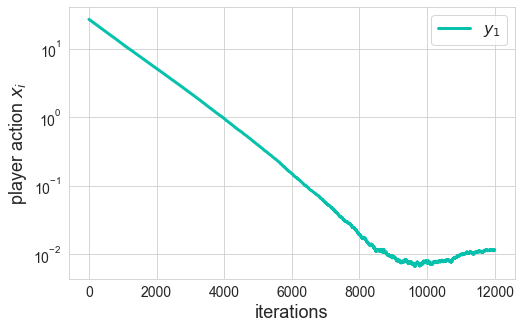

In [702]:
cols=['xkcd:tangerine', 'xkcd:turquoise']
x=np.asarray(data[seeds[0]]['x'])
err_nash=np.asarray([la.norm(x[i,:]-x_ne)**2 for i in range(len(x))])
plt.figure(figsize=(8,5))
for i in range(2):
    plt.plot(x[:,i], color=cols[i], linewidth=3, label=r"$y_{}$".format(i))
plt.tick_params(labelsize=14)
plt.legend(fontsize=16)
plt.ylabel(r"player action $x_i$", fontsize=18)
plt.xlabel("iterations", fontsize=18)

plt.figure(figsize=(8,5))

plt.plot(err_nash, color=cols[i], linewidth=3, label=r"$y_{}$".format(i))
plt.tick_params(labelsize=14)
plt.legend(fontsize=16)
plt.yscale('log')
plt.ylabel(r"player action $x_i$", fontsize=18)
plt.xlabel("iterations", fontsize=18)

In [634]:
x[-1,:]

array([[4.80341582],
       [3.15548466]])

Text(0.5, 0, 'iterations')

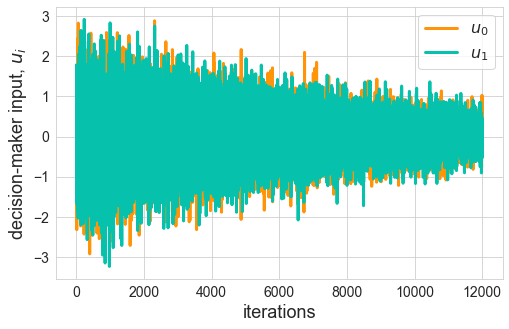

In [703]:
cols=['xkcd:tangerine', 'xkcd:turquoise']
plt.figure(figsize=(8,5))
for i in range(2):
    plt.plot(data[seeds[0]]['uvals'][:,i], color=cols[i], linewidth=3, label=r"$u_{}$".format(i))
plt.tick_params(labelsize=14)
plt.legend(fontsize=16)
plt.ylabel(r"decision-maker input, $u_i$", fontsize=18)
plt.xlabel("iterations", fontsize=18)

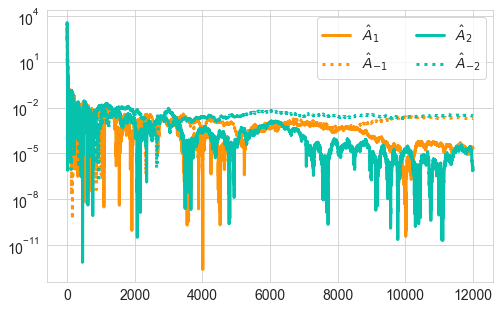

In [704]:
names=['A1_hat', 'Ac1_hat','A2_hat','Ac2_hat']
As={}
name_format=[r'$\hat{A}_1$', r'$\hat{A}_{-1}$', r'$\hat{A}_2$', r'$\hat{A}_{-2}$']
As['A1_hat']={'data':np.asarray(data[seeds[0]]['A1_hat']),'true':ddgame.A1}
As['Ac1_hat']={'data':np.asarray(data[seeds[0]]['Ac1_hat']),'true':ddgame.Ac1}
As['A2_hat']={'data':np.asarray(data[seeds[0]]['A2_hat']),'true':ddgame.A2}
As['Ac2_hat']={'data':np.asarray(data[seeds[0]]['Ac2_hat']),'true':ddgame.Ac2}
cols=['xkcd:tangerine', 'xkcd:turquoise']
ls=['-',':']
plt.figure(figsize=(8,5))
for i,(name,A) in enumerate(As.items()):
    temp=np.asarray([la.norm(A['data'][i]-A['true'],'fro')**2 for i in range(MAXITER)])
    if i%2==0: lsval=ls[0]
    else: lsval=ls[1]
    if i<2: col=cols[0]
    else: col=cols[1]
    plt.plot(temp, linewidth=3, color=col, linestyle=lsval, label=name_format[i])
plt.yscale('log')
plt.tick_params(labelsize=14)
plt.legend(fontsize=14, ncol=2)

In [273]:
print("A1  : ", As['A1_hat']['data'][-1], ddgame.A1)
print("Ac1 : ", As['Ac1_hat']['data'][-1], ddgame.Ac1)
print("A2  : ", As['A2_hat']['data'][-1], ddgame.A2)
print("Ac2 : ", As['Ac2_hat']['data'][-1], ddgame.Ac2)


A1  :  [[-42.14902152]] [[-43.789284]]
Ac1 :  [[31.61512031]] [[33.573215]]
A2  :  [[-66.00965508]] [[-67.14643]]
Ac2 :  [[21.21032789]] [[21.894642]]


In [136]:
dic_so=dic_so_ns[0]
x_so=np.asarray(dic_so['x'])
dic_ne=dic_sgd_ns[0]
x_ne=np.asarray(dic_ne['x'])

Text(0, 0.5, 'surge prices [$]')

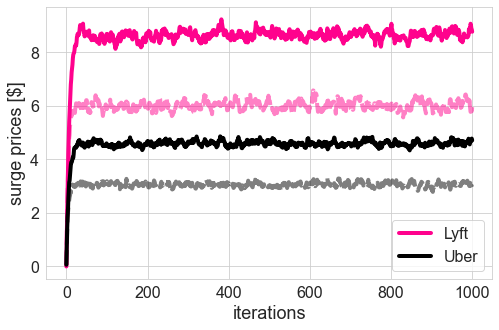

In [137]:
colors=['xkcd:hot pink', 'xkcd:black', 'xkcd:tomato red','xkcd:turquoise', 'xkcd:tangerine','xkcd:cerulean', 'xkcd:orange', 'xkcd:kelly green','xkcd:golden rod']
ls=['-','--']
fs=18; lw=4
player_id=['Lyft', 'Uber']
plt.figure(figsize=(8,5))
for j in range(2):
    plt.plot(x_so[:,j],color=colors[j],label=player_id[j], linewidth=lw)
    plt.plot(x_ne[:,j],color=colors[j], linewidth=lw, linestyle=ls[1], alpha=0.5)
plt.legend(loc='best', fontsize=fs-2)
plt.tick_params(labelsize=fs-2)
plt.xlabel('iterations', fontsize=fs)
plt.ylabel('surge prices [$]',fontsize=fs)

In [140]:
x_so=np.mean(np.asarray(dic_so_ns[0]['x'][-10:]), axis=0)
x_so

array([[8.86529473],
       [4.68822859]])

In [56]:
ix.x_

array([[8.64985879],
       [4.57078137]])

In [348]:
class incent():

    def __init__(self, 
                 x_so, 
                 ddgame, 
                 x0, 
                 MAXOUTER=1000, 
                 MAXINNER=1000, 
                 seed=42, 
                 d=11, 
                 n=2, 
                 eta=5e-5, m=1, gamma=1e-3, batch=1000, sigmas=[0,0], loc_index=0):
        np.random.seed(seed)
        self.seed=seed
        self.batch=batch
        self.x0=x0
        self.sigma1=sigmas[0]
        self.sigma2=sigmas[1]
        self.MAXINNER=MAXINNER
        self.MAXOUTER=MAXOUTER
        self.x_sgd_s={}
        self.x_sgd=[self.x0]
        self.VERBOSE=0
        self.x_so=x_so
        self.ddgame=ddgame
        self.eta=eta
        self.gamma=gamma
        self.err_sgd=[la.norm(self.x_sgd[-1]-self.x_so)]
        self.m=m
        self.x_=np.vstack((self.x_so[0].reshape(-1,1),self.x_so[1].reshape(-1,1)))
        G1=np.hstack((self.ddgame.lam1*np.eye(self.m)-self.ddgame.A1, -0.5*self.ddgame.Ac1))
        G2=np.hstack(( -0.5*self.ddgame.Ac2,self.ddgame.lam2*np.eye(self.m)-self.ddgame.A2))
        self.G=np.vstack((G1,G2))
        self.gradF=lambda u : la.inv(self.G).T@(la.inv(self.G)@u-self.x_)

        #self.u_so=2*self.G@self.x_-np.vstack((self.ddgame.D_z(self.ddgame.ql_[:,:,self.ddgame.price_index_sgd].T, batch=self.batch*10), 
        #             self.ddgame.D_z(self.ddgame.qu_[:,:,self.ddgame.price_index_sgd].T, batch=self.batch*10)))
        
        

        
        self.means = np.vstack((self.ddgame.D_z(self.ddgame.ql_[:,:,self.ddgame.price_index_sgd].T, batch=10000), 
                     self.ddgame.D_z(self.ddgame.qu_[:,:,self.ddgame.price_index_sgd].T, batch=10000)))
        self.best_response = lambda u: 0.5*la.inv(self.G)@(u+self.means)
        self.u_so=2*self.G@self.x_so-self.means
        self.stds = [
            self.ddgame.D_z_std(self.ddgame.ql_[:,:,self.ddgame.price_index_sgd].T, batch=10000),
            self.ddgame.D_z_std(self.ddgame.qu_[:,:,self.ddgame.price_index_sgd].T, batch=10000) 
            ]
        
    def _gradF(self,u):
        return 0.5*la.inv(self.G).T@(0.5*la.inv(self.G)@(u+self.means)-self.x_so)
    
    def _getgradF(self, u,x):
        return la.inv(self.G).T@(x-self.x_so)
    
    def _getgrad_incentive(self,x,z1_,z2_,u):

        p1=-(self.ddgame.A1-self.ddgame.lam1*self.ddgame.I)@x[0]-1/2*(z1_+u[0]+self.ddgame.Ac1@x[1])
        p2=-(self.ddgame.A2-self.ddgame.lam2*self.ddgame.I)@x[1]-1/2*(z2_+u[1]+self.ddgame.Ac2@x[0])

        return np.vstack((p1,p2))
    
    def runSGP(self,u, eta=0.001):
        
        q_lyft_=self.ddgame.ql_[:,:,self.ddgame.price_index_sgd].T
        q_uber_=self.ddgame.qu_[:,:,self.ddgame.price_index_sgd].T
        for _ in range(self.MAXINNER):
            z1_=self.ddgame.D_z(q_lyft_, batch=1)
            z2_=self.ddgame.D_z(q_uber_, batch=1)
            self.x_sgd.append(self.ddgame.proj(self.x_sgd[-1]-self.eta*(self._getgrad_incentive(self.x_sgd[-1],1*z1_,1*z2_,u)+self.sigma1*np.random.rand(2,1))))
            self.err_sgd.append(la.norm(self.x_sgd[-1]-self.x_so))
        return None
    
    def runIncent(self,u0, gamma=None, sgd=True, MAXOUTER=None, PRINT=100):
        np.random.seed(self.seed)
        self.us=[u0]
        if MAXOUTER!=None:
            self.MAXOUTER=MAXOUTER
        if gamma!=None:
            self.gamma=gamma
        for i in range(self.MAXOUTER):
            if sgd:
                self.runSGP(self.us[-1])
                x0=self.x_sgd[-1]
                self.x_sgd_s[i]=self.x_sgd
                self.x_sgd=[x0]
                self.us.append(self.us[-1]-self.gamma*(self._getgradF(self.us[-1], self.x_sgd[-1])+self.sigma2*np.random.rand(2,1)))
            else:
                self.us.append(self.us[-1]-self.gamma*(self._gradF(self.us[-1])+self.sigma2*np.random.rand(2,1)))
            
            #if i%PRINT==0:
            #    print(i, ": ", self.us[-1].flatten()) #, self._gradF(self.us[-1]))
            #print(len(self.us))
            if self.VERBOSE:
                print(self.x_sgd[-1])
                print(self._getgradF(self.us[-1],self.x_sgd[-1]))
                print(self.us[-1])
                print()
            
            
#for i in range(0,MAXOUTER):
# x_sgd=runSGP(u_so_)
# x_sgd=np.asarray(x_sgd)
# plt.plot(x_sgd[:,0,0])
# plt.plot(x_sgd[:,1,0])
# x_sgd[-1], x_so

In [349]:
ix=incent(x_so,ddgame,x0, d=loc_cap, MAXOUTER=5000, MAXINNER=400, seed=42, n=2, eta=5e-3, m=1, gamma=1e-0) #5e-3

In [350]:
ix.means, ix.stds

(array([[446.8565],
        [291.2277]]),
 [array([1.30552453]), array([0.57404093])])

In [209]:
ix.u_so, ix.best_response(ix.u_so)

(array([[207.61558369],
        [163.01839529]]),
 array([[8.86529473],
        [4.68822859]]))

In [210]:
ix.x0

array([[0.00163403],
       [0.06450508]])

In [218]:
u0=250*np.random.rand(2,loc_cap)
#print(u0)
u0=250*np.random.rand(2,loc_cap)
#print(u0)
for i in range(10):
    print(100*np.random.rand(1))

[17.00359999]
[49.96323463]
[39.04701698]
[3.86223402]
[9.98979076]
[94.03515556]
[33.16954574]
[82.57944568]
[47.79066065]
[79.27464248]


In [351]:
np.random.seed(42)
runs={}
u0s={}
gamma=1 #10
seeds=[0] #,42,10,20,21, 30, 40,80, 90, 23, 50, 54, 62, 87,90]
for seed in seeds:
    np.random.seed(seed)
    u0=ix.u_so-100*np.random.rand(1)
    print("seed={}: u0=[{:.3f},{:.3f}]".format(seed, u0[0,0],u0[1,0]))
    ix.runIncent(u0, sgd=True,MAXOUTER=22000, PRINT=0, gamma=gamma) #8000
    runs[seed]={}
    runs[seed]['u0']=u0
    runs[seed]['x']=ix.x_sgd_s
    #runs[seed]['u_so']=ix.u_so
    runs[seed]['u']=ix.us
    print("final u=[{:.3f}, {:.3}]".format(ix.us[-1][0,0], ix.us[-1][1,0]))

seed=0: u0=[152.734,108.137]
final u=[209.826, 1.59e+02]


In [304]:
import pickle as pk
data={
    "runs": runs,
    "seeds": seeds,
    'gamma':gamma,
    #"ix": ix, 
    "notebook": "20230922_socialopt_clean_ride_share_baseparams_SoA_incentives_working_incentives_copy"
}
pk.dump(data, open("data_incentive_rideshare_v3.pk", "wb"))

In [643]:
x_all=[]
for seed in seeds:
    x_all.append(data[seed]['x'])
x_all=np.asarray(x_all)

In [645]:
x_all.shape

(10, 12001, 2, 1)

In [294]:
np.asarray(runs[seed]['u']).shape

(5001, 2, 1)

In [355]:
player_data={}
player_data[0]=[]
player_data[1]=[]
for seed in seeds:
    traj=np.asarray(runs[seed]['u'])
    player_data[0].append(traj[:,0,0])
    player_data[1].append(traj[:,1,0])

for j in range(2): player_data[j]=np.asarray(player_data[j])

In [356]:
player_means={}
player_stds={}
for j in range(2):
    player_means[j]=np.mean(player_data[j], axis=0)
    player_stds[j]=np.std(player_data[j], axis=0)

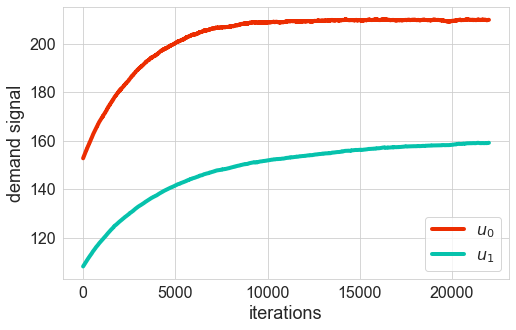

In [357]:
colors=['xkcd:tomato red','xkcd:turquoise', 'xkcd:tangerine','xkcd:cerulean', 'xkcd:orange', 'xkcd:kelly green','xkcd:golden rod']
ls=['-','--']
fs=18; lw=4
import os
floc="./figs/"
if not(os.path.exists(floc)): os.makedirs(floc)
iterations=np.arange(0,22001)
plt.figure(figsize=(8,5))
for j in range(2):
    plt.plot(player_means[j], color=colors[j],label=r"$u_{}$".format(j), linewidth=lw)
    plt.fill_between(iterations,player_means[j]-player_stds[j], player_means[j]+player_stds[j], color=colors[j],alpha=0.3)
for seed in seeds:
    us=np.asarray(runs[seed]['u'])

    for j in range(2):
        plt.plot(us[:,j],color=colors[j],alpha=0.1, linewidth=lw-1)
    plt.legend(loc='best', fontsize=fs-2)
    plt.tick_params(labelsize=fs-2)
    plt.xlabel('iterations', fontsize=fs)
    plt.ylabel('demand signal',fontsize=fs)
#plt.savefig(floc+"demand_signal_incentives_v3.png", dpi=300)

In [258]:
ix.u_so[1]

array([163.01839529])

In [325]:
LEN=12000
player_data={}
player_data[0]=[]
player_data[1]=[]
for seed in seeds:
    traj=np.asarray(runs[seed]['u'])
    player_data[0].append(traj[:,0,0])
    player_data[1].append(traj[:,1,0])

for j in range(2): player_data[j]=np.asarray(player_data[j])

player_means={}
player_stds={}
for j in range(2):
    player_means[j]=np.mean(np.abs(player_data[j]-ix.u_so[j])**2, axis=0)
    player_stds[j]=np.std(np.abs(player_data[j]-ix.u_so[j])**2, axis=0)

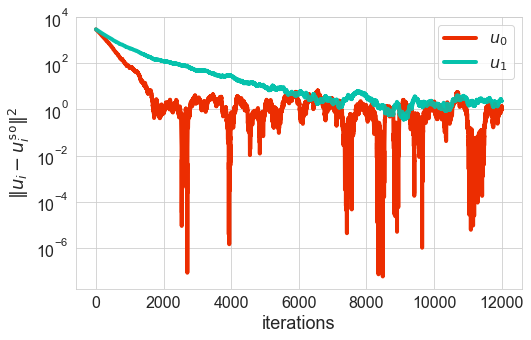

In [326]:
colors=['xkcd:tomato red','xkcd:turquoise', 'xkcd:tangerine','xkcd:cerulean', 'xkcd:orange', 'xkcd:kelly green','xkcd:golden rod']
ls=['-','--']
fs=18; lw=4
import os
floc="./figs/"
if not(os.path.exists(floc)): os.makedirs(floc)
iterations=np.arange(0,LEN+1)
plt.figure(figsize=(8,5))
for j in range(2):
    plt.plot(player_means[j], color=colors[j],label=r"$u_{}$".format(j), linewidth=lw)
    plt.fill_between(iterations,player_means[j]-player_stds[j], player_means[j]+player_stds[j], color=colors[j],alpha=0.3)
for seed in seeds:
    us=np.asarray(runs[seed]['u'])

    for j in range(2):
        plt.plot(np.abs(us[:,j]-ix.u_so[j])**2,color=colors[j],alpha=0.1, linewidth=lw-1)
    plt.legend(loc='best', fontsize=fs-2)
    plt.tick_params(labelsize=fs-2)
    plt.xlabel('iterations', fontsize=fs)
    plt.ylabel(r'$\Vert u_i-u_i^{\tt so}\Vert^2$',fontsize=fs)
plt.yscale('log')
plt.savefig(floc+"error_so_demand_signal_incentives_v3.png", dpi=300)

In [67]:
p1vals=[]
p2vals=[]
for i in range(500):
    sa=np.asarray(ix.x_sgd_s[i])
    p1vals.append(sa[:,0])
    p2vals.append(sa[:,1]) 

Text(0, 0.5, 'social optium regret')

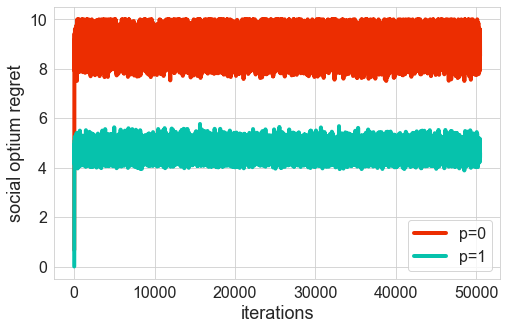

In [68]:
p1vals=np.asarray(p1vals).flatten()
p2vals=np.asarray(p2vals).flatten()
colors=['xkcd:tomato red','xkcd:turquoise', 'xkcd:tangerine','xkcd:cerulean', 'xkcd:orange', 'xkcd:kelly green','xkcd:golden rod']
ls=['-','--']
fs=18; lw=4
plt.figure(figsize=(8,5))
j=0
plt.plot(p1vals,color=colors[j],label="p={}".format(j), linewidth=lw)
j=1
plt.plot(p2vals,color=colors[j],label="p={}".format(j), linewidth=lw)
plt.legend(loc='best', fontsize=fs-2)
plt.tick_params(labelsize=fs-2)
plt.xlabel('iterations', fontsize=fs)
plt.ylabel('social optium regret',fontsize=fs)

In [130]:
ix.x_so

array([[8.64985879],
       [4.57078137]])

In [123]:
ix.x_sgd_s[0]

[array([[0.64235728],
        [0.61605809]]),
 array([[1.80475628],
        [1.4920098 ]]),
 array([[3.09941686],
        [2.37564259]]),
 array([[4.03908159],
        [2.79601243]]),
 array([[4.99753615],
        [3.47576109]]),
 array([[5.49381548],
        [3.71516344]]),
 array([[6.40926963],
        [3.79038807]]),
 array([[6.60677298],
        [3.90003656]]),
 array([[6.68119862],
        [3.79456375]]),
 array([[6.98408417],
        [4.0075935 ]]),
 array([[7.26899872],
        [4.43689912]]),
 array([[7.54588292],
        [4.15182789]]),
 array([[7.67614479],
        [4.66612653]]),
 array([[8.57836009],
        [4.52806326]]),
 array([[8.32762413],
        [4.49236457]]),
 array([[8.31257094],
        [4.44823371]]),
 array([[8.29661744],
        [4.36072788]]),
 array([[8.33029203],
        [4.82080742]]),
 array([[8.33180364],
        [4.65910652]]),
 array([[8.45944506],
        [4.67530974]]),
 array([[8.55440605],
        [4.81974459]]),
 array([[8.86054702],
        [4.7

In [ ]:
colors=['xkcd:tomato red','xkcd:turquoise', 'xkcd:tangerine','xkcd:cerulean', 'xkcd:orange', 'xkcd:kelly green','xkcd:golden rod']
ls=['-','--']
fs=18; lw=4
plt.figure(figsize=(8,5))
for j in range(2):
    plt.plot(ix.x_sgd_s[:,j],color=colors[j],label="p={}".format(j), linewidth=lw)
plt.legend(loc='best', fontsize=fs-2)
plt.tick_params(labelsize=fs-2)
plt.xlabel('iterations', fontsize=fs)
plt.ylabel('social optium regret',fontsize=fs)

In [44]:
np.random.seed(42)
u0=np.random.rand(2,loc_cap)
u0=150*np.random.rand(2,loc_cap) #ix.u_so+
ix.runIncent(ix.u_so)

In [59]:
ix.us

[array([[192.82934879],
        [152.49317664]]),
 array([[192.83884272],
        [152.49666019]]),
 array([[192.84302217],
        [152.49700097]]),
 array([[192.85264393],
        [152.5047317 ]]),
 array([[192.85274827],
        [152.51275266]]),
 array([[192.86053763],
        [152.5181247 ]]),
 array([[192.86169484],
        [152.52536478]]),
 array([[192.87011773],
        [152.52633607]]),
 array([[192.87748075],
        [152.53478647]]),
 array([[192.88312933],
        [152.53899571]]),
 array([[192.89277394],
        [152.54797396]]),
 array([[192.89883874],
        [152.55125772]]),
 array([[192.90315765],
        [152.55769064]]),
 array([[192.91252479],
        [152.55826228]]),
 array([[192.92158203],
        [152.55933585]]),
 array([[192.92837222],
        [152.56561495]]),
 array([[192.93127022],
        [152.57252974]]),
 array([[192.93792336],
        [152.57314866]]),
 array([[192.94289766],
        [152.57390626]]),
 array([[192.9490594 ],
        [152.57991582]]),


In [ ]:
plt.figure(figsize=(10,6))
x_=[]
for i in range(1):
    x_.append(np.asarray(ix.x_sgd_s[i]))
x_=np.asarray(x_)
x_=np.asarray(ix.x_sgd_s[0]) 
plt.plot(x_[:,0,0], color=cs[0], linewidth=4, label='Lyft SO')
plt.plot(x_[:,1,0], color=cs[1], linewidth=4, label='Uber SO')
plt.plot(x_ne[:5000,0,0],":", color=cs[0], linewidth=4, label='Lyft NE')
plt.plot(x_ne[:5000,1,0], ":", color=cs[1], linewidth=4, label='Uber NE')
plt.legend(fontsize=18)
plt.tick_params(labelsize=18)
plt.xlabel('iterations', fontsize=20)
plt.ylabel('prices', fontsize=20)
plt.savefig("lyftyber.png")

In [25]:
ix.x_so

array([[8.64985879],
       [4.57078137]])

In [26]:
ix.us[-1]

array([[191.84301479],
       [151.49699643]])

In [28]:
len(ix.x_sgd_s)

2

In [29]:
plt.figure(figsize=(10,6))
for i in range(90,99):
    x_=np.asarray(ix.x_sgd_s[i])
    plt.plot(x_[:,0,0], color=cs[i], linewidth=4)
#plt.yscale('log')

KeyError: 90

<Figure size 720x432 with 0 Axes>

In [30]:
ix.x_sgd_s[0]

[array([[8.65378449],
        [4.59009858]]),
 array([[8.65023262],
        [4.58944525]]),
 array([[8.64993701],
        [4.59126124]]),
 array([[8.64831607],
        [4.5907845 ]]),
 array([[8.64868483],
        [4.59384133]]),
 array([[8.64605737],
        [4.59430981]]),
 array([[8.64856335],
        [4.59368951]]),
 array([[8.64591633],
        [4.59317594]]),
 array([[8.6424043 ],
        [4.59078247]]),
 array([[8.64144182],
        [4.59117499]]),
 array([[8.64081681],
        [4.59429911]]),
 array([[8.64040752],
        [4.59159661]]),
 array([[8.63940386],
        [4.59575978]]),
 array([[8.6459921 ],
        [4.59509119]]),
 array([[8.64321664],
        [4.594481  ]]),
 array([[8.64225977],
        [4.59380089]]),
 array([[8.64129809],
        [4.59254453]]),
 array([[8.64087076],
        [4.59647403]]),
 array([[8.63981701],
        [4.59574412]]),
 array([[8.64016555],
        [4.59623532]]),
 array([[8.64046552],
        [4.59799349]]),
 array([[8.64297427],
        [4.5

In [31]:
x_ne=np.asarray(dic_sgd_ns[0]['x'])

In [32]:
x_ne

array([[[0.49580928],
        [0.8705498 ]],

       [[0.73597011],
        [0.94773218]],

       [[0.92022977],
        [1.05315678]],

       ...,

       [[6.0089663 ],
        [3.05593461]],

       [[6.01146882],
        [3.03600972]],

       [[5.97977227],
        [3.03653996]]])

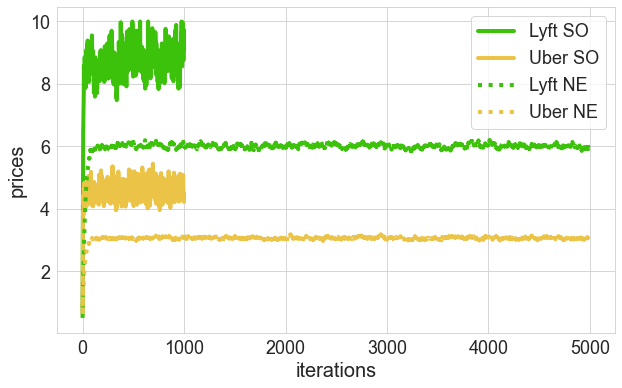

In [118]:
plt.figure(figsize=(10,6))
x_=[]
for i in range(1):
    x_.append(np.asarray(ix.x_sgd_s[i]))
x_=np.asarray(x_)
x_=np.asarray(ix.x_sgd_s[0]) 
plt.plot(x_[:,0,0], color=cs[0], linewidth=4, label='Lyft SO')
plt.plot(x_[:,1,0], color=cs[1], linewidth=4, label='Uber SO')
plt.plot(x_ne[:5000,0,0],":", color=cs[0], linewidth=4, label='Lyft NE')
plt.plot(x_ne[:5000,1,0], ":", color=cs[1], linewidth=4, label='Uber NE')
plt.legend(fontsize=18)
plt.tick_params(labelsize=18)
plt.xlabel('iterations', fontsize=20)
plt.ylabel('prices', fontsize=20)
plt.savefig("lyftyber.png")

## Other Code

In [297]:
x_[-1]

array([[8.64650589],
       [4.56834176]])

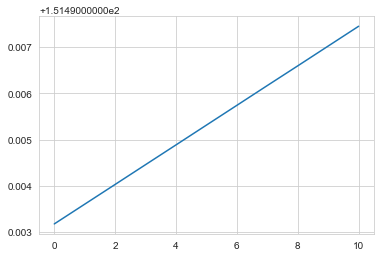

In [35]:
us_=np.asarray(ix.us)
plt.plot(us_[:,1,0])

In [31]:
x_

array([[[6.02572267],
        [3.07396738]],

       [[6.02191382],
        [3.06937765]],

       [[6.01720805],
        [3.06580309]],

       ...,

       [[6.0131411 ],
        [3.06378263]],

       [[6.01894908],
        [3.06392145]],

       [[6.03005294],
        [3.0687946 ]]])

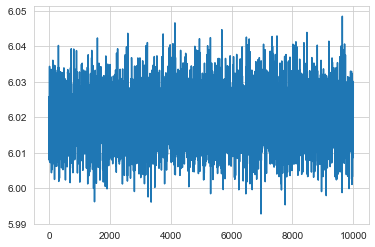

In [32]:
plt.plot(x_[:,0,0])

# Other

In [49]:
verbose=False
BATCH=20

seeds=random.sample(range(1000), 10)
all_data={}
loc_cap=11
nu=0.0001 #0.001 and B=4 #0.0005 B=5 #0.00025 B=5/6
eta=5e-5 #1e-4
lam1=2
lam2=2
loc_lst_index=list(range(0,loc_cap))
price_lst_index=list(range(0,3))
x0=np.random.rand(2,loc_cap)
p1=1; p2=1
if 1: # computes Nash
    MAXITER=50000
    
    loc_lst_index=list(range(0,loc_cap))
    price_lst_index=list(range(0,3))
    ddgame=ddrideshare(loc_lst_index,price_lst_index,seed=2,lam=[lam1,lam2], base=True,tot_rev=0, params={'A1':[],'A2':[],'Ac1':[],'Ac2':[]},maxx=10)
    ddgame.setup_distribution()
    dic_sgd=ddgame.runSGD(x0,eta=0.001,BATCH=10,MAXITER=MAXITER, perform_sgd=[True,True])
    x_sgd=np.asarray(dic_sgd['x'])

    nash=[]
    for i in range(loc_cap):
        nash.append(np.mean(x_sgd[-1000:,:,i],axis=0))
    nash=np.asarray(nash)

MAXITER=8000
ddgame=ddrideshare(loc_lst_index,price_lst_index,seed=2,lam=[lam1,lam2], tot_rev=0, base=True, params={'A1':[],'A2':[],'Ac1':[],'Ac2':[]},maxx=10)
ddgame.setup_distribution()

alpha = np.min([la.norm(-ddgame.A1+ddgame.lam1*np.eye(ddgame.d)),
                la.norm(-ddgame.A2+ddgame.lam2*np.eye(ddgame.d))])-0.5*la.norm(ddgame.Ac1+ddgame.Ac2.T)
print(alpha)

eta_zo = 2
delta = 10*0.5
for seed in seeds:
    all_data[seed]={}
    np.random.seed(seed)
    x0=np.random.rand(2,loc_cap)
    all_data[seed]['x0']=x0
    x_agd=[x0]
    x_sgd=[x0]
    A1_hat = -10*np.random.rand(np.shape(ddgame.A1)[1])
    Ac1_hat = 2*np.random.rand(np.shape(ddgame.Ac1)[1])
    A2_hat = -10*np.random.rand(np.shape(ddgame.A2)[1])
    Ac2_hat = 2*np.random.rand(np.shape(ddgame.Ac2)[1])
    A1_hat=np.diag(A1_hat)
    Ac1_hat=np.diag(Ac1_hat)
    A2_hat=np.diag(A2_hat)
    Ac2_hat=np.diag(Ac2_hat)
    A_dic={}
    A_dic['A1_hat']=A1_hat
    A_dic['Ac1_hat']=Ac1_hat
    A_dic['A2_hat']=A2_hat
    A_dic['Ac2_hat']=Ac2_hat

    dic_agd=ddgame.runAGDAsync(x0,A_dic,eta=eta,nu=nu,BATCH=BATCH,MAXITER=MAXITER, perform_agd=[True,True], INNERITER=1, B=6,UNCORR=True, ps=[p1,p2]) #inner was 100
    dic_sgd=ddgame.runSGDAsync(x0,eta=eta,BATCH=BATCH,MAXITER=MAXITER, perform_sgd=[True,True],ps=[p1,p2])
    x_agd=np.asarray(dic_agd['x'])
    x_sgd=np.asarray(dic_sgd['x'])

    x_dfo=[x0]
    z1_base=ddgame.ql_[:,:,0].T
    z2_base=ddgame.qu_[:,:,0].T
    rev_dfo_p1=[ddgame.revenue(x_dfo[-1],0,z1_base)]
    rev_dfo_p2=[ddgame.revenue(x_dfo[-1],1,z2_base)]
    for i in range(MAXITER):
        z1_=ddgame.D_z(z1_base, batch=BATCH)
        z2_=ddgame.D_z(z2_base, batch=BATCH)
        p1update=np.random.binomial(1,p1)
        p2update=np.random.binomial(1,p2)

        update=ddgame.proj(x_dfo[-1]-(eta_zo/(alpha*(i+1))*ddgame.zograd(x_dfo[-1], z1_, z2_, ddgame.A1, ddgame.Ac1, ddgame.A2, ddgame.Ac2, delta, BATCH=50)))
        
        if p1update and p2update:
            x_dfo.append(update)
        elif p1update and not(p2update):
            x_dfo.append(np.vstack((update[0],x_dfo[-1][1])))
        elif not(p1update) and p2update: 
            x_dfo.append(np.vstack((x_dfo[-1][0],update[1])))
        else:
            x_dfo.append(np.vstack((x_dfo[-1][0],x_dfo[-1][1])))

        rev_dfo_p1.append(ddgame.revenue(x_dfo[-1],0,z1_base))
        rev_dfo_p2.append(ddgame.revenue(x_dfo[-1],1,z2_base))
        
    x_dfo=np.asarray(x_dfo)

    error_dfo=[]
    error_sgd=[]
    error_agd=[]
    for x,y in zip(x_dfo,x_sgd):
        error_dfo.append(la.norm(x.T-nash)**2)
        error_sgd.append(la.norm(y-nash.T)**2)
        
    err_dfo=np.asarray(error_dfo)
    err_sgd=np.asarray(error_sgd)

    for x in x_agd:
        error_agd.append(la.norm(x-nash.T)**2)
        
    err_agd=np.asarray(error_agd)

    all_data[seed]['error_sgd_sync']=err_sgd
    all_data[seed]['error_agd_sync']=err_agd
    all_data[seed]['error_dfo_sync']=err_dfo
    all_data[seed]['revenue_sgd_sync_p1']=dic_sgd['revenue_total_p1']
    all_data[seed]['revenue_sgd_sync_p2']=dic_sgd['revenue_total_p2']
    all_data[seed]['revenue_agd_sync_p1']=dic_agd['revenue_total_p1']
    all_data[seed]['revenue_agd_sync_p2']=dic_agd['revenue_total_p2']
    all_data[seed]['revenue_dfo_sync_p1']=np.asarray(rev_dfo_p1)
    all_data[seed]['revenue_dfo_sync_p2']=np.asarray(rev_dfo_p2)

p1=1; p2=0.5
MAXITER=8000
ddgame=ddrideshare(loc_lst_index,price_lst_index,seed=2,lam=[lam1,lam2],tot_rev=0, base=True, params={'A1':[],'A2':[],'Ac1':[],'Ac2':[]},maxx=10)
ddgame.setup_distribution()
alpha = np.min([la.norm(-ddgame.A1+ddgame.lam1*np.eye(ddgame.d)),la.norm(-ddgame.A2+ddgame.lam2*np.eye(ddgame.d))])-0.5*la.norm(ddgame.Ac1+ddgame.Ac2.T)
print(alpha)

eta_zo = 2
delta = 10*0.5
for seed in seeds:
    
    x0=all_data[seed]['x0']
    x_agd_a=[x0]
    x_sgd_a=[x0]
    A1_hat_a = -10*np.random.rand(np.shape(ddgame.A1)[1])
    Ac1_hat_a = 2*np.random.rand(np.shape(ddgame.Ac1)[1])
    A2_hat_a = -10*np.random.rand(np.shape(ddgame.A2)[1])
    Ac2_hat_a = 2*np.random.rand(np.shape(ddgame.Ac2)[1])
    A1_hat_a=np.diag(A1_hat_a)
    Ac1_hat_a=np.diag(Ac1_hat_a)
    A2_hat_a=np.diag(A2_hat_a)
    Ac2_hat_a=np.diag(Ac2_hat_a)
    A_dic_a={}
    A_dic_a['A1_hat']=A1_hat_a
    A_dic_a['Ac1_hat']=Ac1_hat_a
    A_dic_a['A2_hat']=A2_hat_a
    A_dic_a['Ac2_hat']=Ac2_hat_a

    dic_agd_a=ddgame.runAGDAsync(x0,A_dic,eta=eta,nu=nu,BATCH=BATCH,MAXITER=MAXITER, perform_agd=[True,True], INNERITER=1, B=6,UNCORR=True, ps=[p1,p2]) #inner was 100
    dic_sgd_a=ddgame.runSGDAsync(x0,eta=eta,BATCH=BATCH,MAXITER=MAXITER, perform_sgd=[True,True],ps=[p1,p2])
    x_agd_a=np.asarray(dic_agd_a['x'])
    x_sgd_a=np.asarray(dic_sgd_a['x'])

    x_dfo_a=[x0]
    z1_base=ddgame.ql_[:,:,0].T
    z2_base=ddgame.qu_[:,:,0].T
    rev_dfo_p1_a=[ddgame.revenue(x_dfo_a[-1],0,z1_base)]
    rev_dfo_p2_a=[ddgame.revenue(x_dfo_a[-1],1,z2_base)]
    for i in range(MAXITER):
        z1_=ddgame.D_z(z1_base, batch=BATCH)
        z2_=ddgame.D_z(z2_base, batch=BATCH)
        p1update=np.random.binomial(1,p1)
        p2update=np.random.binomial(1,p2)

        update=ddgame.proj(x_dfo_a[-1]-(eta_zo/(alpha*(i+1))*ddgame.zograd(x_dfo_a[-1], z1_, z2_, ddgame.A1, ddgame.Ac1, ddgame.A2, ddgame.Ac2, delta, BATCH=50)))
        
        if p1update and p2update:
            x_dfo_a.append(update)
        elif p1update and not(p2update):
            x_dfo_a.append(np.vstack((update[0],x_dfo_a[-1][1])))
        elif not(p1update) and p2update: 
            x_dfo_a.append(np.vstack((x_dfo_a[-1][0],update[1])))
        else:
            x_dfo_a.append(np.vstack((x_dfo_a[-1][0],x_dfo_a[-1][1])))

        rev_dfo_p1_a.append(ddgame.revenue(x_dfo_a[-1],0,z1_base))
        rev_dfo_p2_a.append(ddgame.revenue(x_dfo_a[-1],1,z2_base))
        
    x_dfo_a=np.asarray(x_dfo_a)

    error_dfo_a=[]
    error_sgd_a=[]
    error_agd_a=[]
    for x,y in zip(x_dfo_a,x_sgd_a):
        error_dfo_a.append(la.norm(x.T-nash)**2)
        error_sgd_a.append(la.norm(y-nash.T)**2)
        
    err_dfo_a=np.asarray(error_dfo_a)
    err_sgd_a=np.asarray(error_sgd_a)

    for x in x_agd_a:
        error_agd_a.append(la.norm(x-nash.T)**2)
        
    err_agd_a=np.asarray(error_agd_a)

    all_data[seed]['error_sgd']=err_sgd_a
    all_data[seed]['error_agd']=err_agd_a
    all_data[seed]['error_dfo']=err_dfo_a
    all_data[seed]['revenue_sgd_p1']=dic_sgd_a['revenue_total_p1']
    all_data[seed]['revenue_sgd_p2']=dic_sgd_a['revenue_total_p2']
    all_data[seed]['revenue_agd_p1']=dic_agd_a['revenue_total_p1']
    all_data[seed]['revenue_agd_p2']=dic_agd_a['revenue_total_p2']
    all_data[seed]['revenue_dfo_p1']=np.asarray(rev_dfo_p1_a)
    all_data[seed]['revenue_dfo_p2']=np.asarray(rev_dfo_p2_a)

Price we are running at :  10
96.62504658689721
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
96.62504658689721
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Pric

In [34]:
verbose=False
BATCH=20


loc_cap=11
nu=0.0001 #0.001 and B=4 #0.0005 B=5 #0.00025 B=5/6
eta=5e-5 #1e-4
lam1=2
lam2=2
loc_lst_index=list(range(0,loc_cap))
price_lst_index=list(range(0,3))
x0=np.random.rand(2,loc_cap)
p1=1; p2=0.5
if 0: # computes Nash
    MAXITER=50000
    
    loc_lst_index=list(range(0,loc_cap))
    price_lst_index=list(range(0,3))
    ddgame=ddrideshare(loc_lst_index,price_lst_index,seed=2,lam=[lam1,lam2],tot_rev=0, base=True, params={'A1':[],'A2':[],'Ac1':[],'Ac2':[]},maxx=10)
    ddgame.setup_distribution()
    dic_sgd=ddgame.runSGD(x0,eta=0.001,BATCH=10,MAXITER=MAXITER, perform_sgd=[True,True])
    x_sgd=np.asarray(dic_sgd['x'])

    nash=[]
    for i in range(loc_cap):
        nash.append(np.mean(x_sgd[-1000:,:,i],axis=0))
    nash=np.asarray(nash)

MAXITER=10000
ddgame=ddrideshare(loc_lst_index,price_lst_index,seed=2,lam=[lam1,lam2],tot_rev=0, base=True, params={'A1':[],'A2':[],'Ac1':[],'Ac2':[]},maxx=10)
ddgame.setup_distribution()
alpha = np.min([la.norm(-ddgame.A1+ddgame.lam1*np.eye(ddgame.d)),la.norm(-ddgame.A2+ddgame.lam2*np.eye(ddgame.d))])-0.5*la.norm(ddgame.Ac1+ddgame.Ac2.T)
print(alpha)

eta_zo = 2
delta = 10*0.5
for seed in seeds:
    
    x0=all_data[seed]['x0']
    x_agd_a=[x0]
    x_sgd_a=[x0]
    A1_hat_a = -10*np.random.rand(np.shape(ddgame.A1)[1])
    Ac1_hat_a = 2*np.random.rand(np.shape(ddgame.Ac1)[1])
    A2_hat_a = -10*np.random.rand(np.shape(ddgame.A2)[1])
    Ac2_hat_a = 2*np.random.rand(np.shape(ddgame.Ac2)[1])
    A1_hat_a=np.diag(A1_hat_a)
    Ac1_hat_a=np.diag(Ac1_hat_a)
    A2_hat_a=np.diag(A2_hat_a)
    Ac2_hat_a=np.diag(Ac2_hat_a)
    A_dic_a={}
    A_dic_a['A1_hat']=A1_hat_a
    A_dic_a['Ac1_hat']=Ac1_hat_a
    A_dic_a['A2_hat']=A2_hat_a
    A_dic_a['Ac2_hat']=Ac2_hat_a

    dic_agd_a=ddgame.runAGDAsync(x0,A_dic,eta=eta,nu=nu,BATCH=BATCH,MAXITER=MAXITER, perform_agd=[True,True], INNERITER=1, B=6,UNCORR=True, ps=[p1,p2]) #inner was 100
    dic_sgd_a=ddgame.runSGDAsync(x0,eta=eta,BATCH=BATCH,MAXITER=MAXITER, perform_sgd=[True,True],ps=[p1,p2])
    x_agd_a=np.asarray(dic_agd_a['x'])
    x_sgd_a=np.asarray(dic_sgd_a['x'])

    x_dfo_a=[x0]
    z1_base=ddgame.ql_[:,:,0].T
    z2_base=ddgame.qu_[:,:,0].T
    rev_dfo_p1_a=[ddgame.revenue(x_dfo_a[-1],0,z1_base)]
    rev_dfo_p2_a=[ddgame.revenue(x_dfo_a[-1],1,z2_base)]
    for i in range(MAXITER):
        z1_=ddgame.D_z(z1_base, batch=BATCH)
        z2_=ddgame.D_z(z2_base, batch=BATCH)
        p1update=np.random.binomial(1,p1)
        p2update=np.random.binomial(1,p2)

        update=ddgame.proj(x_dfo_a[-1]-(eta_zo/(alpha*(i+1))*ddgame.zograd(x_dfo_a[-1], z1_, z2_, ddgame.A1, ddgame.Ac1, ddgame.A2, ddgame.Ac2, delta, BATCH=50)))
        
        if p1update and p2update:
            x_dfo_a.append(update)
        elif p1update and not(p2update):
            x_dfo_a.append(np.vstack((update[0],x_dfo_a[-1][1])))
        elif not(p1update) and p2update: 
            x_dfo_a.append(np.vstack((x_dfo_a[-1][0],update[1])))
        else:
            x_dfo_a.append(np.vstack((x_dfo_a[-1][0],x_dfo_a[-1][1])))

        rev_dfo_p1_a.append(ddgame.revenue(x_dfo_a[-1],0,z1_base))
        rev_dfo_p2_a.append(ddgame.revenue(x_dfo_a[-1],1,z2_base))
        
    x_dfo_a=np.asarray(x_dfo_a)

    error_dfo_a=[]
    error_sgd_a=[]
    error_agd_a=[]
    for x,y in zip(x_dfo_a,x_sgd_a):
        error_dfo_a.append(la.norm(x.T-nash)**2)
        error_sgd_a.append(la.norm(y-nash.T)**2)
        
    err_dfo_a=np.asarray(error_dfo_a)
    err_sgd_a=np.asarray(error_sgd_a)

    for x in x_agd_a:
        error_agd_a.append(la.norm(x-nash.T)**2)
        
    err_agd_a=np.asarray(error_agd_a)

    all_data[seed]['error_sgd']=err_sgd_a
    all_data[seed]['error_agd']=err_agd_a
    all_data[seed]['error_dfo']=err_dfo_a
    all_data[seed]['revenue_sgd_p1']=dic_sgd_a['revenue_total_p1']
    all_data[seed]['revenue_sgd_p2']=dic_sgd_a['revenue_total_p2']
    all_data[seed]['revenue_agd_p1']=dic_agd_a['revenue_total_p1']
    all_data[seed]['revenue_agd_p2']=dic_agd_a['revenue_total_p2']
    all_data[seed]['revenue_dfo_p1']=np.asarray(rev_dfo_p1_a)
    all_data[seed]['revenue_dfo_p2']=np.asarray(rev_dfo_p2_a)



96.62504658689721
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10
Price we are running at :  10


(11, 11)


In [8]:

all_data={}
all_data[1]={}


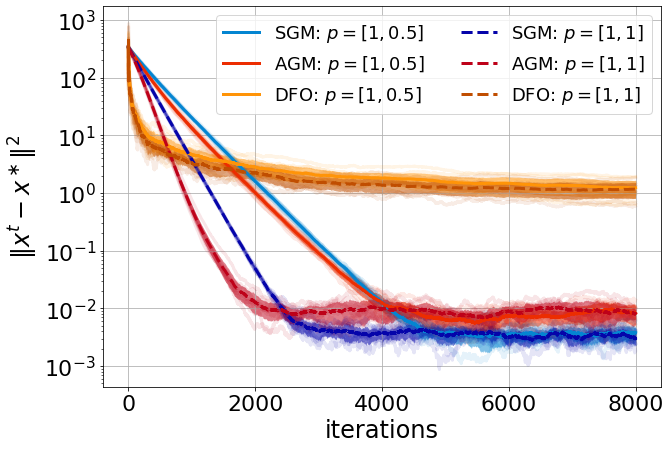

In [50]:
## Generate Plots
fname="RS_Asynch"
filename='./figs/20230420/'+fname+'_20230423_convergence.'
SAVE=1

errs_agd=[]
errs_dfo=[]

errs_sgd=[]
errs_sgd_synch=[]
errs_agd_synch=[]
errs_dfo_synch=[]

fs=24
for seed in seeds:
    errs_agd.append(all_data[seed]['error_agd'])
    errs_sgd.append(all_data[seed]['error_sgd'])
    errs_dfo.append(all_data[seed]['error_dfo'])
    
    errs_sgd_synch.append(all_data[seed]['error_sgd_sync'])
    errs_agd_synch.append(all_data[seed]['error_agd_sync'])
    errs_dfo_synch.append(all_data[seed]['error_dfo_sync'])
    
errs_agd=np.asarray(errs_agd)
errs_sgd=np.asarray(errs_sgd)
errs_sgd_synch=np.asarray(errs_sgd_synch)
errs_agd_synch=np.asarray(errs_agd_synch)

errs_agd_mean=np.mean(errs_agd,axis=0)
errs_sgd_mean_synch=np.mean(errs_sgd_synch,axis=0)
errs_agd_mean_synch=np.mean(errs_agd_synch,axis=0)

errs_sgd_mean=np.mean(errs_sgd,axis=0)

errs_agd_var=np.std(errs_agd,axis=0)
errs_sgd_var=np.std(errs_sgd,axis=0)
errs_sgd_var_synch=np.std(errs_sgd_synch,axis=0)

errs_agd_var_synch=np.std(errs_agd_synch,axis=0)

errs_dfo=np.asarray(errs_dfo)
errs_dfo_mean=np.mean(errs_dfo,axis=0)
errs_dfo_var=np.std(errs_dfo,axis=0)

errs_dfo_synch=np.asarray(errs_dfo_synch)
errs_dfo_mean_synch=np.mean(errs_dfo_synch,axis=0)
errs_dfo_var_synch=np.std(errs_dfo_synch,axis=0)

cols_sgd_sync='xkcd:royal blue'
cols_agd_sync='xkcd:scarlet'
cols_dfo_sync='xkcd:burnt orange'
cols_sgd='xkcd:cerulean'
cols_agd='xkcd:tomato red'
cols_dfo='xkcd:tangerine'

iterations=np.arange(0,MAXITER+1)
fig=plt.figure(figsize=(10,7))
for i in range(len(errs_sgd)):
    plt.plot(errs_dfo[i,:], linewidth=3,color=cols_dfo, alpha=0.1)
    plt.plot(errs_sgd[i,:], linewidth=3,color=cols_sgd, alpha=0.1)
    plt.plot(errs_agd[i,:], linewidth=3, alpha=0.1, color=cols_agd)
    plt.plot(errs_sgd_synch[i,:], linewidth=3,color=cols_sgd_sync, alpha=0.1)
    plt.plot(errs_agd_synch[i,:], linewidth=3, alpha=0.1, color=cols_agd_sync)
    plt.plot(errs_dfo_synch[i,:], linewidth=3,color=cols_dfo_sync, alpha=0.1)
    




plt.plot(errs_sgd_mean, linewidth=3,color=cols_sgd, label=r'SGM: $p=[1,0.5]$')
plt.fill_between(iterations,errs_sgd_mean+errs_sgd_var,errs_sgd_mean-errs_sgd_var, alpha=0.5, 
                 linewidth=0,color=cols_sgd)
plt.plot(errs_agd_mean, linewidth=3, color=cols_agd, label=r'AGM: $p=[1,0.5]$')
plt.fill_between(iterations,errs_agd_mean+errs_agd_var,errs_agd_mean-errs_agd_var, alpha=0.5, 
                 linewidth=0, color=cols_agd)
plt.plot(errs_dfo_mean, linewidth=3,color=cols_dfo, label=r'DFO: $p=[1,0.5]$')
plt.fill_between(iterations,errs_dfo_mean+errs_dfo_var,errs_dfo_mean-errs_dfo_var, alpha=0.5, 
                 linewidth=0,color=cols_dfo)


plt.plot(errs_sgd_mean_synch, linewidth=3,color=cols_sgd_sync, label=r'SGM: $p=[1,1]$', linestyle='--')
plt.fill_between(iterations,errs_sgd_mean_synch+errs_sgd_var_synch,errs_sgd_mean_synch-errs_sgd_var_synch,
                  alpha=0.5, 
                 linewidth=0,color=cols_sgd_sync)
plt.plot(errs_agd_mean_synch, linewidth=3,color=cols_agd_sync, label=r'AGM: $p=[1,1]$', linestyle='--')
plt.fill_between(iterations,errs_agd_mean_synch+errs_agd_var_synch,errs_agd_mean_synch-errs_agd_var_synch, alpha=0.5, 
                 linewidth=0,color=cols_agd_sync)
plt.plot(errs_dfo_mean_synch, linewidth=3,color=cols_dfo_sync, label=r'DFO: $p=[1,1]$', linestyle='--')
plt.fill_between(iterations,errs_dfo_mean_synch+errs_dfo_var_synch,errs_dfo_mean_synch-errs_dfo_var_synch, alpha=0.5, 
                 linewidth=0,color=cols_dfo_sync)






plt.yscale('log')

plt.grid(True)

plt.tick_params(labelsize=fs-2)
plt.ylabel(r'$\Vert x^t-x^\ast\Vert^2$', fontsize=fs)
plt.xlabel(r'iterations', fontsize=fs)
plt.legend(fontsize=fs-6, loc='best',ncol=2) #,bbox_to_anchor=(1, -0.15))
if SAVE:
    for tag in ['pdf','png']:
        plt.savefig(filename+tag,  bbox_inches='tight', dpi=300)



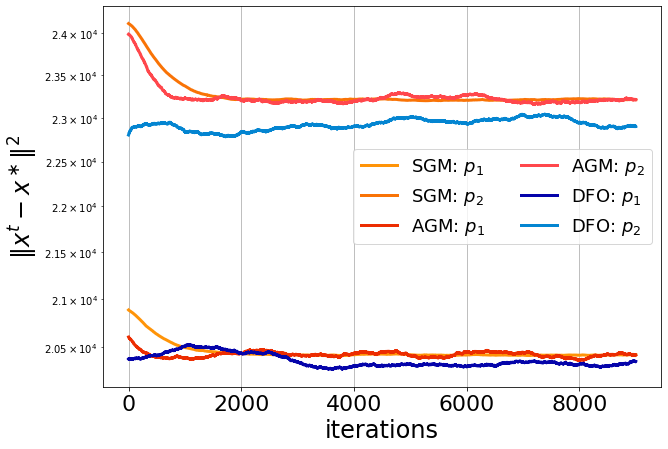

In [48]:
## Generate Plots
fname="RS_Async_rev_"
filename='./figs/20230420/'+fname+'_20230422_convergence.'
SAVE=1

rev_agd_p1=[]; rev_agd_p2=[]
rev_sgd_p1=[]; rev_sgd_p2=[]
rev_dfo_p1=[]; rev_dfo_p2=[]
errs_dfo=[]

errs_sgd=[]
errs_sgd_synch=[]
errs_agd_synch=[]
errs_dfo_synch=[]

fs=24
for seed in seeds:
    rev_sgd_p1.append(all_data[seed]['revenue_sgd_p1'])
    rev_sgd_p2.append(all_data[seed]['revenue_sgd_p2'])
    rev_agd_p1.append(all_data[seed]['revenue_agd_p1'])
    rev_agd_p2.append(all_data[seed]['revenue_agd_p2'])
    rev_dfo_p1.append(all_data[seed]['revenue_dfo_p1'])
    rev_dfo_p2.append(all_data[seed]['revenue_dfo_p2'])


    
rev_sgd_p1=np.asarray(rev_sgd_p1)
rev_sgd_p2=np.asarray(rev_sgd_p2)
rev_agd_p1=np.asarray(rev_agd_p1)
rev_agd_p2=np.asarray(rev_agd_p2)
rev_dfo_p1=np.asarray(rev_dfo_p1)
rev_dfo_p2=np.asarray(rev_dfo_p2)


rev_sgd_mean_p1=np.mean(rev_sgd_p1,axis=0)
rev_sgd_mean_p2=np.mean(rev_sgd_p2,axis=0)
rev_agd_mean_p1=np.mean(rev_agd_p1,axis=0)
rev_agd_mean_p2=np.mean(rev_agd_p2,axis=0)
rev_dfo_mean_p1=np.mean(rev_dfo_p1,axis=0)
rev_dfo_mean_p2=np.mean(rev_dfo_p2,axis=0)

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

rev_sgd_mean_p1=running_mean(rev_sgd_mean_p1,1000)
rev_sgd_mean_p2=running_mean(rev_sgd_mean_p2,1000)

rev_agd_mean_p1=running_mean(rev_agd_mean_p1,1000)
rev_agd_mean_p2=running_mean(rev_agd_mean_p2,1000)

rev_dfo_mean_p1=running_mean(rev_dfo_mean_p1,1000)
rev_dfo_mean_p2=running_mean(rev_dfo_mean_p2,1000)

rev_sgd_var_p1=np.std(rev_sgd_p1,axis=0)
rev_sgd_var_p2=np.std(rev_sgd_p2,axis=0)
rev_agd_var_p1=np.std(rev_agd_p1,axis=0)
rev_agd_var_p2=np.std(rev_agd_p2,axis=0)
rev_dfo_var_p1=np.std(rev_dfo_p1,axis=0)
rev_dfo_var_p2=np.std(rev_dfo_p2,axis=0)
#rev_sgd_mean_sync_p1=np.mean(rev_sgd_p1,axis=0)
#rev_sgd_mean_sync_p2=np.mean(rev_sgd_p2,axis=0)

pcols_dfo=['xkcd:royal blue','xkcd:cerulean']
pcols_sgd=['xkcd:tangerine','xkcd:orange']
pcols_agd=['xkcd:tomato red','xkcd:light red']

cols_sgd_sync='xkcd:royal blue'
cols_agd_sync='xkcd:scarlet'
cols_dfo_sync='xkcd:burnt orange'
cols_sgd='xkcd:cerulean'
cols_agd='xkcd:tomato red'
cols_dfo='xkcd:tangerine'

iterations=np.arange(0,MAXITER+1)
fig=plt.figure(figsize=(10,7))
# for i in range(len(rev_sgd_p1)):
#     plt.plot(rev_dfo_p1[i,:], linewidth=3,color=pcols_dfo[0], alpha=0.1)
#     plt.plot(rev_dfo_p2[i,:], linewidth=3,color=pcols_dfo[1], alpha=0.1)

#     plt.plot(rev_agd_p1[i,:], linewidth=3,color=pcols_agd[0], alpha=0.1)
#     plt.plot(rev_agd_p2[i,:], linewidth=3,color=pcols_agd[1], alpha=0.1)

#     plt.plot(rev_sgd_p1[i,:], linewidth=3,color=pcols_sgd[0], alpha=0.1)
#     plt.plot(rev_sgd_p2[i,:], linewidth=3,color=pcols_sgd[1], alpha=0.1)

    




plt.plot(rev_sgd_mean_p1, linewidth=3,color=pcols_sgd[0], label=r'SGM: $p_1$')
plt.plot(rev_sgd_mean_p2, linewidth=3,color=pcols_sgd[1], label=r'SGM: $p_2$')

plt.plot(rev_agd_mean_p1, linewidth=3,color=pcols_agd[0], label=r'AGM: $p_1$')
plt.plot(rev_agd_mean_p2, linewidth=3,color=pcols_agd[1], label=r'AGM: $p_2$')

plt.plot(rev_dfo_mean_p1, linewidth=3,color=pcols_dfo[0], label=r'DFO: $p_1$')
plt.plot(rev_dfo_mean_p2, linewidth=3,color=pcols_dfo[1], label=r'DFO: $p_2$')

# plt.fill_between(iterations,errs_sgd_mean+errs_sgd_var,errs_sgd_mean-errs_sgd_var, alpha=0.5, 
#                  linewidth=0,color=cols_sgd)

# plt.plot(errs_agd_mean, linewidth=3, color=cols_agd, label=r'AGM: $p=[1,0.5]$')
# plt.fill_between(iterations,errs_agd_mean+errs_agd_var,errs_agd_mean-errs_agd_var, alpha=0.5, 
#                  linewidth=0, color=cols_agd)
# plt.plot(errs_dfo_mean, linewidth=3,color=cols_dfo, label=r'DFO: $p=[1,0.5]$')
# plt.fill_between(iterations,errs_dfo_mean+errs_dfo_var,errs_dfo_mean-errs_dfo_var, alpha=0.5, 
#                  linewidth=0,color=cols_dfo)









plt.yscale('log')

plt.grid(True)

plt.tick_params(labelsize=fs-2)
plt.ylabel(r'$\Vert x^t-x^\ast\Vert^2$', fontsize=fs)
plt.xlabel(r'iterations', fontsize=fs)
plt.legend(fontsize=fs-6, loc='best',ncol=2) #,bbox_to_anchor=(1, -0.15))
if SAVE:
    for tag in ['pdf','png']:
        plt.savefig(filename+tag,  bbox_inches='tight', dpi=300)



In [45]:
rev_agd_p2

[array([26020.33397703, 23742.42513486, 23779.83902595, ...,
        20899.86426025, 24508.513922  , 25899.83550064]),
 array([22362.4297332 , 25861.31192306, 20629.08463605, ...,
        27419.20136762, 21215.95325871, 20492.44213701]),
 array([23417.10786683, 24183.42061267, 25841.58572145, ...,
        24567.94663734, 24461.66099655, 18533.64793959]),
 array([26936.2129147 , 23210.29042448, 22378.18841547, ...,
        26512.28973548, 22855.69617303, 26121.28375312]),
 array([22973.32322396, 27293.87862005, 25506.90934629, ...,
        21495.00744178, 25530.06443921, 23498.97290555]),
 array([24430.87810908, 28785.63619512, 24135.39998637, ...,
        19808.46125208, 25408.94368999, 24571.64478776]),
 array([27403.5724812 , 26671.39661561, 20951.14269054, ...,
        18946.8093493 , 20454.65113897, 22687.06605649]),
 array([21537.46601754, 22631.04857284, 24449.81276251, ...,
        24615.95846997, 24226.16295977, 22173.84901686]),
 array([23029.07046786, 23889.62192581, 27398.56

In [142]:
# run all three cases

loc_cap=1
nu=0.0001 #0.001 and B=4 #0.0005 B=5 #0.00025 B=5/6
eta=5e-5 #1e-4
lam1=2
lam2=2
loc_lst_index=list(range(0,loc_cap))
price_lst_index=list(range(0,5))
x0=np.random.rand(2,loc_cap)
p1=1; p2=0.5

MAXITER=10000
ddgame=ddrideshare(loc_lst_index,price_lst_index,seed=2,lam=[lam1,lam2],tot_rev=0, base=True, params={'A1':[],'A2':[],'Ac1':[],'Ac2':[]},maxx=10)
ddgame.setup_distribution()
alpha = np.min([la.norm(-ddgame.A1+ddgame.lam1*np.eye(ddgame.d)),la.norm(-ddgame.A2+ddgame.lam2*np.eye(ddgame.d))])-0.5*la.norm(ddgame.Ac1+ddgame.Ac2.T)
print(alpha)

dic_rgd_ns={}
dic_so_ns={}
dic_sgd_ns={}
for price_index in range(0,1):

    dic_sgd_ns[price_index]=ddgame.runSGD(x0,eta=0.001,price_index=price_index,BATCH=10,MAXITER=MAXITER, perform_sgd=[True,True],tot_rev=0)
    #dic_agd_n=ddgame.runAGD(x0,eta=0.001,price_index=price_index,BATCH=10,MAXITER=MAXITER,tot_rev=0)
    dic_so_ns[price_index]=ddgame.runSO(x0,eta=0.001,price_index=price_index,MAXITER=MAXITER,tot_rev=0)


#    dic_rgd_ns[price_index]=ddgame.runRGD(x0,eta=0.001,price_index=price_index,BATCH=10,MAXITER=MAXITER,tot_rev=0)


    # x_so=np.asarray(dic_so_n['x'])
    # x_sgd=np.asarray(dic_sgd_n['x'])
    # x_rgd=np.asarray(dic_rgd_n['x'])

    # error_so=[]
    # error_sgd=[]
    # error_rgd=[]
    # for x,y in zip(x_so,x_sgd):
    #     error_so.append(la.norm(x.T-nash)**2)
    #     error_sgd.append(la.norm(y-nash.T)**2)
        
    # err_so=np.asarray(error_so)
    # err_sgd=np.asarray(error_sgd)

    # for x in x_rgd:
    #     error_rgd.append(la.norm(x-nash.T)**2)
        
    # err_rgd=np.asarray(error_rgd)



18.055355072021484
Price we are running at :  10
Price we are running at :  10


In [143]:
dic_sgd_ns[0]['x'][-10:]
x_so=np.mean(np.asarray(dic_so_ns[0]['x'][-10:]), axis=0)

[array([[6.04574276],
        [3.04004991]]),
 array([[6.05604465],
        [3.05197599]]),
 array([[6.04992503],
        [3.05484021]]),
 array([[6.0534837 ],
        [3.05338938]]),
 array([[6.04380507],
        [3.06517783]]),
 array([[6.0288175],
        [3.0555952]]),
 array([[6.02300534],
        [3.0560111 ]]),
 array([[6.0089663 ],
        [3.05593461]]),
 array([[6.01146882],
        [3.03600972]]),
 array([[5.97977227],
        [3.03653996]])]

In [144]:
x_so=np.mean(np.asarray(dic_so_ns[0]['x'][-10:]), axis=0)

$\|x^\ast(u)-x^{\tt so}\|^2$

$f_{\tt so}(u)=\frac{1}{2}\|x^\ast(u)-x^{\tt so}\|^2$

$x^\ast(u)=\text{\tt NE}(f_1(x;u),f_2(x;u))$

$\begin{bmatrix}
\nabla_1f_1\\ 
\nabla_2f_2
\end{bmatrix}= \begin{bmatrix}
-(A_{11}-\lambda_1I)^\top x_1-\frac{1}{2}(\xi_1+A_{12}x_2)\\
-(A_{22}-\lambda_2I)^\top x_2-\frac{1}{2}(\xi_2+A_{21}x_1)
\end{bmatrix}$

$\begin{bmatrix}
\nabla_1f_1(;u_1)\\ 
\nabla_2f_2(; u_2)
\end{bmatrix}= \begin{bmatrix}
-(A_{11}-\lambda_1I)^\top x_1-\frac{1}{2}(\xi_1+u_1+A_{12}x_2)\\
-(A_{22}-\lambda_2I)^\top x_2-\frac{1}{2}(\xi_2+u_2+A_{21}x_1)
\end{bmatrix}$

$\begin{bmatrix}
\lambda_1I-A_{11} & -\frac{1}{2}A_{12}\\
-\frac{1}{2}A_{21} & \lambda_2I-A_{22}
\end{bmatrix}\begin{bmatrix}
x_1\\ x_2
\end{bmatrix}-\frac{1}{2}\begin{bmatrix}
\xi_1\\ \xi_2
\end{bmatrix}=\begin{bmatrix}
u_1\\ u_2
\end{bmatrix}$

In expectation, the $\xi$'s drop out so that we have

$x^\ast(u)=\begin{bmatrix}
\lambda_1I-A_{11} & -\frac{1}{2}A_{12}\\
-\frac{1}{2}A_{21} & \lambda_2I-A_{22}
\end{bmatrix}^{-1}\begin{bmatrix}u_1\\ u_2
\end{bmatrix}$

$\nabla_u f_{\tt so}(u)=\nabla_ux^\ast(u)(x^\ast(u)-x^{\tt so}) = \begin{bmatrix}
\lambda_1I-A_{11} & -\frac{1}{2}A_{12}\\
-\frac{1}{2}A_{21} & \lambda_2I-A_{22}
\end{bmatrix}^{-\top}\left(\begin{bmatrix}
\lambda_1I-A_{11} & -\frac{1}{2}A_{12}\\
-\frac{1}{2}A_{21} & \lambda_2I-A_{22}
\end{bmatrix}^{-1}\begin{bmatrix}u_1\\ u_2
\end{bmatrix}-x^{\tt so}\right)$

$x,x^{\tt so}\in \mathbb{R}^{d\times 1}$

$\nabla_u f_{\tt so}\in \mathbb{R}^{d\times 1}$

$(1\times d) ((d\times d) (d\times 1)-(d\times 1)) (d\times d)=(1\times d)(d\times 1)(d\times d)=d\times d$

In [1]:
d=1
x_=np.vstack((x_so[0].reshape(-1,1),x_so[1].reshape(-1,1)))
G1=np.hstack((ddgame.lam1*np.eye(d)-ddgame.A1, -0.5*ddgame.Ac1))
G2=np.hstack(( -0.5*ddgame.Ac2,ddgame.lam2*np.eye(d)-ddgame.A2))
G=np.vstack((G1,G2))
gradF=lambda u : la.inv(G).T@(la.inv(G)@u-x_)

NameError: name 'np' is not defined

In [191]:
ddgame.D_z(ddgame.ql_[:,:,ddgame.price_index_sgd].T)

array([461.])

In [192]:
ddgame.A2, ddgame.Ac2, ddgame.A1, ddgame.Ac1

(array([[-67.14643]], dtype=float32),
 array([[21.894642]], dtype=float32),
 array([[-43.789284]], dtype=float32),
 array([[33.573215]], dtype=float32))

In [193]:
u=np.random.rand(d*2).reshape(-1,1)
gradF(u).shape

(2, 1)

In [209]:
u_so=2*G@x_-np.vstack((ddgame.D_z(ddgame.ql_[:,:,ddgame.price_index_sgd].T, batch=10000), 
                     ddgame.D_z(ddgame.qu_[:,:,ddgame.price_index_sgd].T, batch=10000)))
print(u_so)
u_so_=u_so.reshape(2,d)
u_so_

[[191.95914879]
 [150.34587664]]


array([[191.95914879],
       [150.34587664]])

In [210]:
u_so=2*G@x_-np.vstack((ddgame.D_z(ddgame.ql_[:,:,ddgame.price_index_sgd].T, batch=10000), 
                     ddgame.D_z(ddgame.qu_[:,:,ddgame.price_index_sgd].T, batch=10000)))
print(u_so)
u_so_=u_so.reshape(2,d)
u_so_

MAXOUTER=1000
def getgrad_incentive(x,z1_,z2_,u):

    p1=-(ddgame.A1-ddgame.lam1*ddgame.I)@x[0]-1/2*(z1_+u[0]+ddgame.Ac1@x[1])
    p2=-(ddgame.A2-ddgame.lam2*ddgame.I)@x[1]-1/2*(z2_+u[1]+ddgame.Ac2@x[0])

    return np.vstack((p1,p2))
def runSGP(u, MAXINNER=1*MAXITER, eta=0.001):
    x_sgd=[x0]
    q_lyft_=ddgame.ql_[:,:,ddgame.price_index_sgd].T
    q_uber_=ddgame.qu_[:,:,ddgame.price_index_sgd].T
    for i in range(MAXINNER):
        z1_=ddgame.D_z(q_lyft_, batch=10000)
        z2_=ddgame.D_z(q_uber_, batch=10000)
        x_sgd.append(ddgame.proj(x_sgd[-1]-eta*getgrad_incentive(x_sgd[-1],1*z1_,1*z2_,u)))
    return x_sgd

#for i in range(0,MAXOUTER):
x_sgd=runSGP(u_so_)
x_sgd=np.asarray(x_sgd)
plt.plot(x_sgd[:,0,0])
x_sgd[-1], x_so, dic_sgd_ns[0]['x'][-1]

array([[8.65789939],
       [4.57045059]])

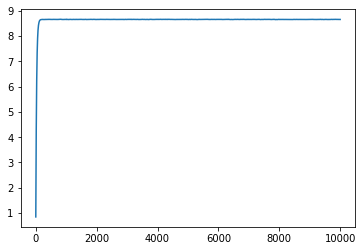

In [211]:

x_sgd=runSGP(u_so_)
x_sgd=np.asarray(x_sgd)
plt.plot(x_sgd[:,0,0])
x_sgd[-1]

In [199]:
x_so, dic_sgd_ns[0]['x'][-1]

(array([[8.64985879],
        [4.57078137]]),
 array([[5.97977227],
        [3.03653996]]))

In [124]:
data

,Lyft SO,Uber SO,SO,Lyft NE,Uber NE,NE,Lyft PS,Uber PS,PS
0,6731.475229,8529.873909,15261.349138,5852.723350,7518.467045,13371.190394,3892.181978,9080.152441,12972.334419
1,5399.801105,5563.521993,10963.323098,4756.188240,4800.552026,9556.740266,3177.643645,4037.093954,7214.737599
2,937.659723,1051.269420,1988.929143,826.835391,905.811841,1732.647232,356.359155,502.577234,858.936388
3,2174.995314,2598.557161,4773.552475,1886.345080,2281.849583,4168.194663,1003.881131,1125.063126,2128.944258
4,809.319269,670.375626,1479.694895,737.365535,558.110764,1295.476299,294.716938,334.758032,629.474970


In [88]:
data=pd.DataFrame(columns=['Lyft SO','Uber SO','SO','Lyft NE','Uber NE','NE','Lyft PS','Uber PS','PS'])
vars=pd.DataFrame(columns=['Lyft SO','Uber SO','SO','Lyft NE','Uber NE','NE','Lyft PS','Uber PS','PS'])
poa=pd.DataFrame(columns=['PS','NE'])
for price_index in range(0,5):
  rev_so_p1=np.asarray(dic_so_ns[price_index]['revenue_total_p1'])
  rev_so_p2=np.asarray(dic_so_ns[price_index]['revenue_total_p2'])
  social_rev=rev_so_p1+rev_so_p2

  rev_sgd_p1=np.asarray(dic_sgd_ns[price_index]['revenue_total_p1'])
  rev_sgd_p2=np.asarray(dic_sgd_ns[price_index]['revenue_total_p2'])

  rev_rgd_p1=np.asarray(dic_rgd_ns[price_index]['revenue_total_p1'])
  rev_rgd_p2=np.asarray(dic_rgd_ns[price_index]['revenue_total_p2'])

  # where to store

  fs=24
  bdd=1000 # how many points to average

  lyft_rev_so=running_mean(rev_so_p1,N=100) # Nash - myopic
  uber_rev_so=running_mean(rev_so_p2,N=100)
  lyft_rev_so_final=np.mean(lyft_rev_so[-bdd:])
  uber_rev_so_final=np.mean(uber_rev_so[-bdd:])
  lyft_rev_var_so = np.std(lyft_rev_so[-bdd:])
  uber_rev_var_so = np.std(uber_rev_so[-bdd:])
  var=[lyft_rev_var_so, uber_rev_var_so]

  lyft_rev_sgd=running_mean(rev_sgd_p1,N=100) # Nash - myopic
  uber_rev_sgd=running_mean(rev_sgd_p2,N=100)
  lyft_rev_sgd_final=np.mean(lyft_rev_sgd[-bdd:])
  uber_rev_sgd_final=np.mean(uber_rev_sgd[-bdd:])
  lyft_rev_var_sgd = np.std(lyft_rev_sgd[-bdd:])
  uber_rev_var_sgd = np.std(uber_rev_sgd[-bdd:])
  var=[lyft_rev_var_sgd, uber_rev_var_sgd]

  lyft_rev_rgd=running_mean(rev_rgd_p1,N=100) # Nash - myopic
  uber_rev_rgd=running_mean(rev_rgd_p2,N=100)
  lyft_rev_rgd_final=np.mean(lyft_rev_rgd[-bdd:])
  uber_rev_rgd_final=np.mean(uber_rev_rgd[-bdd:])
  lyft_rev_var_rgd = np.std(lyft_rev_rgd[-bdd:])
  uber_rev_var_rgd = np.std(uber_rev_rgd[-bdd:])
  var=[lyft_rev_var_rgd, uber_rev_var_rgd]


  #fig, ax = plt.subplots(1, 1, figsize=(14, 7))

 # data=['Lyft Revenue', 'Uber Revenue']
  #data_=['Lyft Demand', 'Uber Demand']
  #x_pos = [i for i, _ in enumerate(data)]
  #x_pos_ = [i for i, _ in enumerate(data_)]

  tot_so=lyft_rev_so_final+uber_rev_so_final
  tot_ne=lyft_rev_sgd_final+uber_rev_sgd_final
  tot_ps=lyft_rev_rgd_final+uber_rev_rgd_final
  var_so=np.std(lyft_rev_so[-bdd:]+uber_rev_so[-bdd:])
  var_sgd=np.std(lyft_rev_sgd[-bdd:]+uber_rev_sgd[-bdd:])
  var_rgd=np.std(lyft_rev_rgd[-bdd:]+uber_rev_rgd[-bdd:])
  vals=[lyft_rev_so_final, uber_rev_so_final,tot_so,lyft_rev_sgd_final, uber_rev_sgd_final,tot_ne,lyft_rev_rgd_final,uber_rev_rgd_final,tot_ps]
  data.loc[len(data.index)]=vals
  var=[lyft_rev_var_so, uber_rev_var_so,var_so,lyft_rev_var_sgd, uber_rev_var_sgd,var_sgd,lyft_rev_var_rgd, uber_rev_var_rgd,var_rgd]
  vars.loc[len(data.index)]=var


  poa_ps=tot_ps/tot_so
  poa_ne=tot_ne/tot_so
  poa.loc[len(poa.index)]=[poa_ps,poa_ne]



In [133]:
np.mean(ddgame.qlbar, axis=0)

array([381.03896104, 354.53246753, 143.83116883, 215.16233766,
       143.16233766])

In [93]:
poa

,PS,NE
0,0.850012,0.876147
1,0.658079,0.871701
2,0.431859,0.871146
3,0.445987,0.873185
4,0.425409,0.875502


In [134]:
data

,Lyft SO,Uber SO,SO,Lyft NE,Uber NE,NE,Lyft PS,Uber PS,PS
0,6731.475229,8529.873909,15261.349138,5852.723350,7518.467045,13371.190394,3892.181978,9080.152441,12972.334419
1,5399.801105,5563.521993,10963.323098,4756.188240,4800.552026,9556.740266,3177.643645,4037.093954,7214.737599
2,937.659723,1051.269420,1988.929143,826.835391,905.811841,1732.647232,356.359155,502.577234,858.936388
3,2174.995314,2598.557161,4773.552475,1886.345080,2281.849583,4168.194663,1003.881131,1125.063126,2128.944258
4,809.319269,670.375626,1479.694895,737.365535,558.110764,1295.476299,294.716938,334.758032,629.474970


In [135]:
data['Lyft SO'].loc[0]

6731.475228649147

In [142]:
groups=['$10', '$15','$20','$25','$30']
values1=[data['Lyft SO'].loc[0]]
values2=[data['Uber SO'].loc[0]]


In [137]:
data_=data[['Lyft SO', 'Uber SO', 'Lyft NE', 'Uber NE', 'Lyft PS', 'Uber PS']].copy()
data_

,Lyft SO,Uber SO,Lyft NE,Uber NE,Lyft PS,Uber PS
0,6731.475229,8529.873909,5852.723350,7518.467045,3892.181978,9080.152441
1,5399.801105,5563.521993,4756.188240,4800.552026,3177.643645,4037.093954
2,937.659723,1051.269420,826.835391,905.811841,356.359155,502.577234
3,2174.995314,2598.557161,1886.345080,2281.849583,1003.881131,1125.063126
4,809.319269,670.375626,737.365535,558.110764,294.716938,334.758032


<AxesSubplot:>

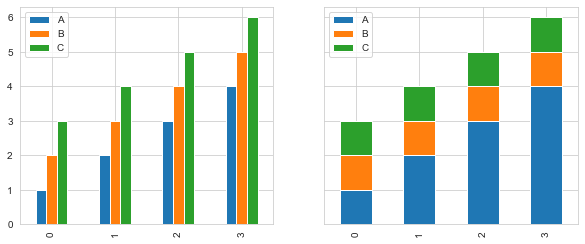

In [151]:
df = pd.DataFrame(dict(
    A=[1, 2, 3, 4],
    B=[2, 3, 4, 5],
    C=[3, 4, 5, 6]
))

df.diff(axis=1)
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

df.plot.bar(ax=axes[0])
df.diff(axis=1).fillna(df).astype(df.dtypes).plot.bar(ax=axes[1], stacked=True)

/var/folders/4j/4svhn30n7tb4l7xvn6prn48w0000gn/T/ipykernel_29640/1608537267.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(groups)


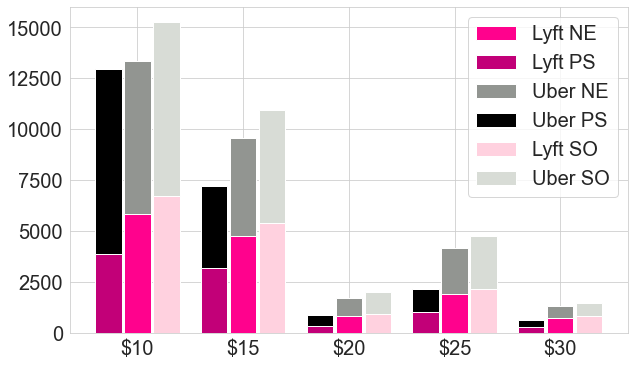

In [217]:
#ab_bar_list = [plt.bar(groups, data_[['Uber NE','Lyft NE']], align='edge', width= 0.2, stacked=True)]
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(range(0,5), data_['Lyft NE'], label='Lyft NE', color='xkcd:hot pink',width= 0.25)
ax.bar([i-0.15 for i in range(0,5)], data_['Lyft PS'], label='Lyft PS',align='edge', color='xkcd:magenta',width= -0.25)
ax.bar(range(0,5), data_['Uber NE'], width= 0.25, bottom=data_['Lyft NE'], color='xkcd:grey',label='Uber NE')
ax.bar([i-0.275 for i in range(0,5)], data_['Uber PS'], label='Uber PS',bottom=data_['Lyft PS'], color='xkcd:black',width= 0.25)
ax.bar([i+0.15 for i in range(0,5)], data_['Lyft SO'], label='Lyft SO',align='edge', color='xkcd:light pink',width=0.25)
ax.bar([i+0.275 for i in range(0,5)], data_['Uber SO'], label='Uber SO',bottom=data_['Lyft SO'], color='xkcd:light grey',width= 0.25)
ax.legend(fontsize=20)
groups=['$0','$10', '$15','$20','$25','$30']
ax.set_xticklabels(groups)
plt.tick_params(labelsize=20)
plt.savefig('./figs/20230420/revenue.pdf')

to sum under the social cost is higher, and lyft makese progressivey more moving from PS to NE to SO. so taking into account performative effects is good for lyft. THis is in part because lyft is the "smaller" player (i.e. there is less demand for lyft on average than uber in the base demand so accounting for performative effects allows them to have a strategic advantage.  ) Uber also does marginally better moving from PS to NE to SO but its gain is smaller than Lyft. This suggests investigating how market power (size of the base market) plays a role in whether or not firms should invest in accounting for performativity, versus the simpler repeated retraining process.

<AxesSubplot:>

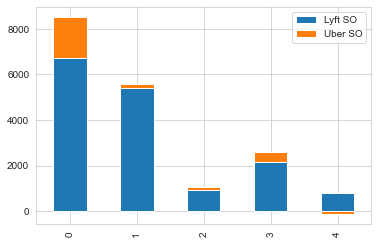

In [155]:
data_[['Lyft SO','Uber SO']].diff(axis=1).fillna(data_[['Lyft SO','Uber SO']]).astype(data_[['Lyft SO','Uber SO']].dtypes).plot.bar( stacked=True)

ConversionError: Failed to convert value(s) to axis units:        Lyft SO      Uber SO
0  6731.475229  8529.873909
1  5399.801105  5563.521993
2   937.659723  1051.269420
3  2174.995314  2598.557161
4   809.319269   670.375626

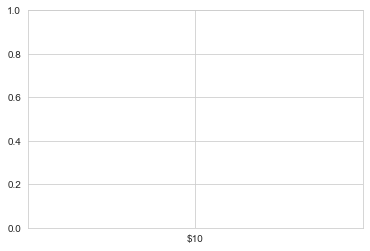

In [156]:
f, ax = plt.subplots()
ax.bar(groups,data_[['Lyft SO','Uber SO']], align='edge', width=-0.2, bottom=data_[['Lyft SO']])

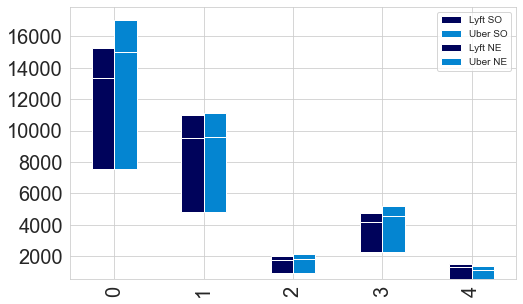

In [148]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,5))
sns.set_style("whitegrid")
ax.grid(True)


    #plt.bar(groups, data_[['Lyft SO','Uber SO']], align='edge', width= 0.2, bottom=data_['Uber SO']),
    #           plt.bar(groups, data_[['Lyft NE','Uber NE']], align='edge', width= 0.2, bottom=data_['Uber NE'])]
#cd_bar_list = [plt.bar(groups, data_['Lyft NE'], align='edge', width= -0.2, color='xkcd:hot pink'),
#               plt.bar(groups, data_['Uber NE'], align='edge', width= -0.2, color='xkcd:black')]


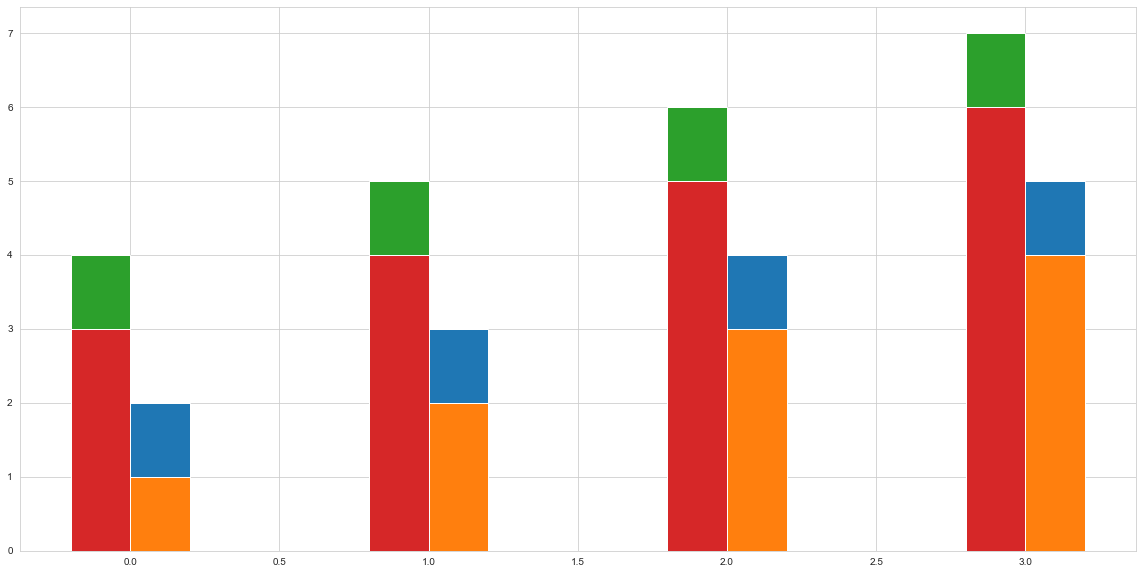

In [140]:

df = pd.DataFrame(dict(
    A=[1, 2, 3, 4],
    B=[2, 3, 4, 5],
    C=[3, 4, 5, 6],
    D=[4, 5, 6, 7]))

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20, 10))

ab_bar_list = [plt.bar([0, 1, 2, 3], df.B, align='edge', width= 0.2),
               plt.bar([0, 1, 2, 3], df.A, align='edge', width= 0.2)]

cd_bar_list = [plt.bar([0, 1, 2, 3], df.D, align='edge',width= -0.2),
               plt.bar([0, 1, 2, 3], df.C, align='edge',width= -0.2)]

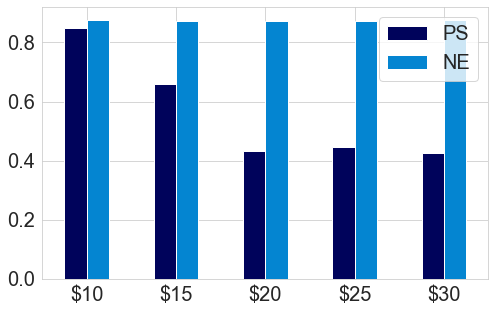

In [123]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,5))
sns.set_style("whitegrid")
ax.grid(True)
poa.plot(ax=ax, color=['xkcd:dark blue','xkcd:cerulean'], fontsize=20, kind='bar')
plt.legend(fontsize=20)
#sns.barplot(x=['10','15','20','25','30'], y=poa)
plt.xticks(range(0,5),['$10','$15','$20','$25','$30'], rotation=0)
plt.savefig("./figs/20230420/poa.pdf")

14


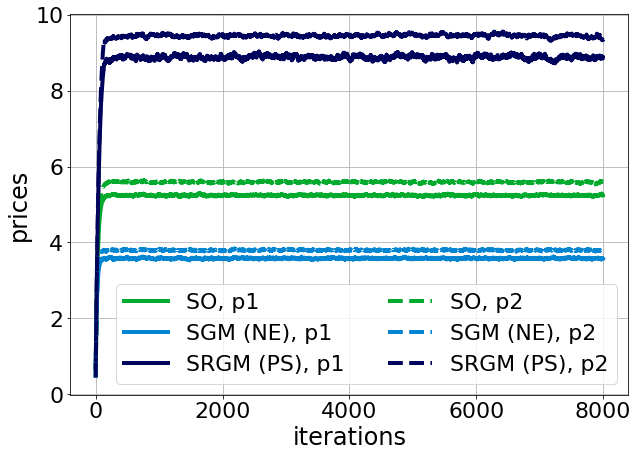

In [76]:
fname_='20230423_'
# get mean prices
x_so_avg_p1=np.mean(x_so[:,0,:],axis=1)
x_so_avg_p2=np.mean(x_so[:,1,:],axis=1)
x_sgd_avg_p1=np.mean(x_sgd[:,0,:],axis=1)
x_sgd_avg_p2=np.mean(x_sgd[:,1,:],axis=1)
x_rgd_avg_p1=np.mean(x_rgd[:,0,:],axis=1)
x_rgd_avg_p2=np.mean(x_rgd[:,1,:],axis=1)

SAVE=0
fs=24
fname='./figs/PoA/prices_RGD_SGD_SO_loc_'+fname_+'.'
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ls_=['-','--']
lw=4
oss=[0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.4,0.3,0.2,0.1,0.0]
print(len(oss))


plt.plot(x_so_avg_p1[:], label='SO, p1',ls=ls_[0],alpha=1.0, lw=lw, color='xkcd:kelly green')
plt.plot(x_sgd_avg_p1[:], label='SGM (NE), p1',ls=ls_[0],alpha=1.0, lw=lw, color='xkcd:cerulean')
plt.plot(x_rgd_avg_p1[:], label='SRGM (PS), p1',ls=ls_[0],alpha=1.0, lw=lw, color='xkcd:dark blue')
plt.plot(x_so_avg_p2[:], label='SO, p2',ls=ls_[1],alpha=1.0, lw=lw, color='xkcd:kelly green')
plt.plot(x_sgd_avg_p2[:], label='SGM (NE), p2',ls=ls_[1],alpha=1.0, lw=lw, color='xkcd:cerulean')
plt.plot(x_rgd_avg_p2[:], label='SRGM (PS), p2',ls=ls_[1],alpha=1.0, lw=lw, color='xkcd:dark blue')
ax.grid(True)
ax.set_xlabel(r'iterations', fontsize=fs)
ax.legend(fontsize=fs-2,ncol=2) #loc='center',bbox_to_anchor=(0.5,-0.2),ncol=6)
plt.tick_params(labelsize=fs-2)


plt.ylabel(r'prices', fontsize=fs)
if SAVE:
    for tag in ['png','pdf']:
        plt.savefig(fname+tag, dpi=300, transparent=True, bbox_inches='tight')

In [77]:
rev_so_p1=np.asarray(dic_so_n['revenue_total_p1'])
rev_so_p2=np.asarray(dic_so_n['revenue_total_p2'])
social_rev=rev_so_p1+rev_so_p2

rev_sgd_p1=np.asarray(dic_sgd_n['revenue_total_p1'])
rev_sgd_p2=np.asarray(dic_sgd_n['revenue_total_p2'])

rev_rgd_p1=np.asarray(dic_rgd_n['revenue_total_p1'])
rev_rgd_p2=np.asarray(dic_rgd_n['revenue_total_p2'])

14


Text(0, 0.5, 'revenue')

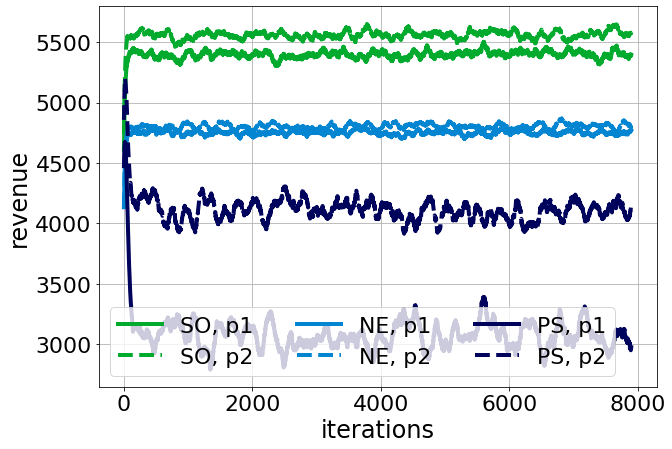

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ls_=['-','--']
lw=4
oss=[0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.4,0.3,0.2,0.1,0.0]
print(len(oss))
mean_val=100
rev_so_p1_=running_mean(rev_so_p1,N=mean_val)
rev_so_p2_=running_mean(rev_so_p2,N=mean_val)
rev_sgd_p1_=running_mean(rev_sgd_p1,N=mean_val)
rev_sgd_p2_=running_mean(rev_sgd_p2,N=mean_val)
rev_rgd_p1_=running_mean(rev_rgd_p1,N=mean_val)
rev_rgd_p2_=running_mean(rev_rgd_p2,N=mean_val)
plt.plot(rev_so_p1_, label='SO, p1',ls=ls_[0],alpha=1.0, lw=lw, color='xkcd:kelly green')
plt.plot(rev_so_p2_, label='SO, p2',ls=ls_[1],alpha=1, lw=lw, color='xkcd:kelly green')
plt.plot(rev_sgd_p1_, label='NE, p1',ls=ls_[0],alpha=1.0, lw=lw, color='xkcd:cerulean')
plt.plot(rev_sgd_p2_, label='NE, p2',ls=ls_[1],alpha=1, lw=lw, color='xkcd:cerulean')
plt.plot(rev_rgd_p1_, label='PS, p1',ls=ls_[0],alpha=1.0, lw=lw, color='xkcd:dark blue')
plt.plot(rev_rgd_p2_, label='PS, p2',ls=ls_[1],alpha=1.0, lw=lw, color='xkcd:dark blue')
ax.grid(True)
ax.set_xlabel(r'iterations', fontsize=fs)
ax.legend(fontsize=fs-2,ncol=3) #loc='center',bbox_to_anchor=(0.5,-0.2),ncol=6)
plt.tick_params(labelsize=fs-2)


plt.ylabel(r'revenue', fontsize=fs)

yes


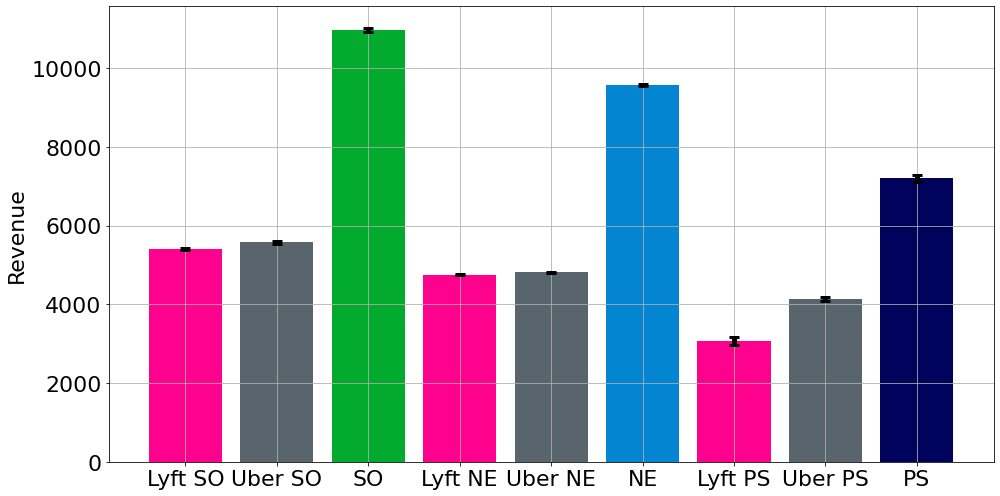

In [85]:
# where to store
SAVE=0
filename='./figs/PoA/exp_f_change_rev_demand_'+fname_+'.'
fs=24
bdd=1000 # how many points to average

lyft_rev_so=running_mean(rev_so_p1,N=100) # Nash - myopic
uber_rev_so=running_mean(rev_so_p2,N=100)
lyft_rev_so_final=np.mean(lyft_rev_so[-bdd:])
uber_rev_so_final=np.mean(uber_rev_so[-bdd:])
lyft_rev_var_so = np.std(lyft_rev_so[-bdd:])
uber_rev_var_so = np.std(uber_rev_so[-bdd:])
var=[lyft_rev_var_so, uber_rev_var_so]

lyft_rev_sgd=running_mean(rev_sgd_p1,N=100) # Nash - myopic
uber_rev_sgd=running_mean(rev_sgd_p2,N=100)
lyft_rev_sgd_final=np.mean(lyft_rev_sgd[-bdd:])
uber_rev_sgd_final=np.mean(uber_rev_sgd[-bdd:])
lyft_rev_var_sgd = np.std(lyft_rev_sgd[-bdd:])
uber_rev_var_sgd = np.std(uber_rev_sgd[-bdd:])
var=[lyft_rev_var_sgd, uber_rev_var_sgd]

lyft_rev_rgd=running_mean(rev_rgd_p1,N=100) # Nash - myopic
uber_rev_rgd=running_mean(rev_rgd_p2,N=100)
lyft_rev_rgd_final=np.mean(lyft_rev_rgd[-bdd:])
uber_rev_rgd_final=np.mean(uber_rev_rgd[-bdd:])
lyft_rev_var_rgd = np.std(lyft_rev_rgd[-bdd:])
uber_rev_var_rgd = np.std(uber_rev_rgd[-bdd:])
var=[lyft_rev_var_rgd, uber_rev_var_rgd]


fig, ax = plt.subplots(1, 1, figsize=(14, 7))

data=['Lyft Revenue', 'Uber Revenue']
data_=['Lyft Demand', 'Uber Demand']
x_pos = [i for i, _ in enumerate(data)]
x_pos_ = [i for i, _ in enumerate(data_)]

tot_so=lyft_rev_so_final+uber_rev_so_final
tot_ne=lyft_rev_sgd_final+uber_rev_sgd_final
tot_ps=lyft_rev_rgd_final+uber_rev_rgd_final
var_so=np.std(lyft_rev_so[-bdd:]+uber_rev_so[-bdd:])
var_sgd=np.std(lyft_rev_sgd[-bdd:]+uber_rev_sgd[-bdd:])
var_rgd=np.std(lyft_rev_rgd[-bdd:]+uber_rev_rgd[-bdd:])
vals=[lyft_rev_so_final, uber_rev_so_final,tot_so,lyft_rev_sgd_final, uber_rev_sgd_final,tot_ne,lyft_rev_rgd_final,uber_rev_rgd_final,tot_ps]
var=[lyft_rev_var_so, uber_rev_var_so,var_so,lyft_rev_var_sgd, uber_rev_var_sgd,var_sgd,lyft_rev_var_rgd, uber_rev_var_rgd,var_rgd]
vals_=[lyft_rev_sgd_final, uber_rev_sgd_final]
_vals=[lyft_rev_sgd_final,uber_rev_sgd_final]

dic={key: val for key, val in zip(data,vals)}
ax.grid(True)


ax.set_ylabel("Revenue", fontsize=fs-2)
ax.set_xticks([0,1,2,3,4,5,6,7,8])
ax.set_xticklabels(['Lyft SO','Uber SO','SO','Lyft NE','Uber NE','NE','Lyft PS','Uber PS','PS'], fontsize=fs-2)
ax.bar([0,1,2,3,4,5,6,7,8], vals , yerr=var, color=['xkcd:hot pink', 'xkcd:slate grey','xkcd:kelly green','xkcd:hot pink', 
                                                       'xkcd:slate grey','xkcd:cerulean','xkcd:hot pink', 'xkcd:slate grey','xkcd:dark blue'],
          error_kw=dict(lw=5, capsize=5, capthick=3, color='xkcd:light pink'),
        )

plt.tick_params(labelsize=fs-2)
ax.tick_params(labelsize=fs-2)
plt.tight_layout()

fname='./figs/20230420/15_revenue_so_comp.'
if 1:
    print("yes")
    for tag in ['pdf', 'png']:
        plt.savefig(fname+tag, dpi=300, bbox_inches='tight', transparent=True)

In [81]:
loss_so_p1=np.asarray(dic_so_n['loss_p1'])
loss_so_p2=np.asarray(dic_so_n['loss_p2'])
social_loss=loss_so_p1+loss_so_p2

loss_sgd_p1=np.asarray(dic_sgd_n['loss_p1'])
loss_sgd_p2=np.asarray(dic_sgd_n['loss_p2'])

loss_rgd_p1=np.asarray(dic_rgd_n['loss_p1'])
loss_rgd_p2=np.asarray(dic_rgd_n['loss_p2'])

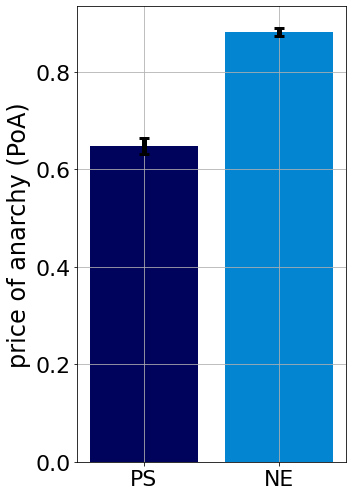

In [82]:
# where to store
filename='./figs/20230420/PoA_15_'+fname_+'.'
fs=24
bdd=1000 # how many points to average

lyft_rev_so=running_mean(loss_so_p1,N=100) # Nash - myopic
uber_rev_so=running_mean(loss_so_p2,N=100)
lyft_rev_so_final=np.mean(lyft_rev_so[-bdd:])
uber_rev_so_final=np.mean(uber_rev_so[-bdd:])
lyft_rev_var_so = np.std(lyft_rev_so[-bdd:])
uber_rev_var_so = np.std(uber_rev_so[-bdd:])
var=[lyft_rev_var_so, uber_rev_var_so]

lyft_rev_sgd=running_mean(loss_sgd_p1,N=100) # Nash - myopic
uber_rev_sgd=running_mean(loss_sgd_p2,N=100)
lyft_rev_sgd_final=np.mean(lyft_rev_sgd[-bdd:])
uber_rev_sgd_final=np.mean(uber_rev_sgd[-bdd:])
lyft_rev_var_sgd = np.std(lyft_rev_sgd[-bdd:])
uber_rev_var_sgd = np.std(uber_rev_sgd[-bdd:])
var=[lyft_rev_var_sgd, uber_rev_var_sgd]


lyft_rev_rgd=running_mean(loss_rgd_p1,N=100) # Nash - myopic
uber_rev_rgd=running_mean(loss_rgd_p2,N=100)
lyft_rev_rgd_final=np.mean(lyft_rev_rgd[-bdd:])
uber_rev_rgd_final=np.mean(uber_rev_rgd[-bdd:])
lyft_rev_var_rgd = np.std(lyft_rev_rgd[-bdd:])
uber_rev_var_rgd = np.std(uber_rev_rgd[-bdd:])
var=[lyft_rev_var_rgd, uber_rev_var_rgd]



fig, ax = plt.subplots(1, 1, figsize=(5, 7), sharey=True)

data=['Lyft Revenue', 'Uber Revenue']
data_=['Lyft Demand', 'Uber Demand']
x_pos = [i for i, _ in enumerate(data)]
x_pos_ = [i for i, _ in enumerate(data_)]

tot_so=lyft_rev_so_final+uber_rev_so_final
tot_ne=lyft_rev_sgd_final+uber_rev_sgd_final
tot_ps=lyft_rev_rgd_final+uber_rev_rgd_final

poa_ps=tot_ps/tot_so
poa_ne=tot_ne/tot_so



loss_tot_vec=lyft_rev_sgd[-bdd:]+uber_rev_sgd[-bdd:]
poa_vec_ne=[l/tot_so for l in loss_tot_vec]
poa_ne_mean=np.mean(np.asarray(poa_vec_ne))
poa_ne_var=np.std(np.asarray(poa_vec_ne))

loss_tot_vec=lyft_rev_rgd[-bdd:]+uber_rev_rgd[-bdd:]
poa_vec_ps=[l/tot_so for l in loss_tot_vec]
poa_ps_mean=np.mean(np.asarray(poa_vec_ps))
poa_ps_var=np.std(np.asarray(poa_vec_ps))

poa=[poa_ps_mean, poa_ne_mean]
poa_var=[poa_ps_var, poa_ne_var]


dic={key: val for key, val in zip(data,vals)}
ax.grid(True)


ax.set_ylabel("price of anarchy (PoA)", fontsize=fs)


ax.set_xticks([0,1])
ax.set_xticklabels(['PS','NE'], fontsize=fs-2) #'Lyft NE','Uber NE','NE','Lyft PS','Uber PS','PS']
ax.bar([0,1], poa , yerr=poa_var, color=['xkcd:dark blue', 'xkcd:cerulean'],
          error_kw=dict(lw=5, capsize=5, capthick=3, color='xkcd:light pink'),
        )



plt.tick_params(labelsize=fs-2)

plt.tight_layout()
SAVE=1

if SAVE:
    for tag in ['pdf', 'png']:
        plt.savefig(filename+tag, dpi=300, bbox_inches='tight', transparent=True)